In [1]:
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
import Modules
import Sequential
import Optimizer
from helpers import generate_disc_set, plot_data, train_model_SGD

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(nb_sample=1000, show_data=True)

<Figure size 600x600 with 1 Axes>

def train_model_SGD(model, criterion, 

                    train_input, train_target, test_input, test_target,
                    
                    mini_batch_size, nb_epochs, eta = 1e-4, wd = None, 
                    
                    momentum = False, adaptive = False
                    
                    plot_loss = False, plot_data = False):

In [2]:
#Hyperparameters
lr = 2e-4
wd = 1e-6
nb_epochs = 500
mini_batch_size = 50

#Modules
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)
relu = Modules.ReLu()
tanh = Modules.Tanh() 
softmax = Modules.Softmax()

# Models
model = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, tanh)
model2 = Sequential.Sequential(m1, relu, m2, relu, m3, relu, m4, softmax)

# Loss criterions
MSE = Modules.MSE()
CROSS = Modules.CrossEntropyLoss()

MSE
0 train_loss 675.61 test_error 62.00%
50 train_loss 489.02 test_error 46.40%
100 train_loss 467.96 test_error 26.30%
150 train_loss 380.40 test_error 25.80%
200 train_loss 246.19 test_error 14.70%
250 train_loss 186.40 test_error 4.70%
300 train_loss 164.96 test_error 5.30%
350 train_loss 155.55 test_error 2.80%
400 train_loss 150.24 test_error 3.50%
450 train_loss 144.83 test_error 3.70%
499 train_loss 141.29 test_error 3.70%


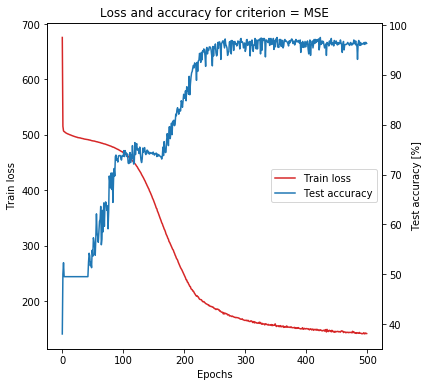

CrossEntropyLoss
0 train_loss 736.52 test_error 49.50%
50 train_loss 674.24 test_error 35.70%
100 train_loss 649.88 test_error 27.10%
150 train_loss 580.12 test_error 25.70%
200 train_loss 484.86 test_error 20.60%
250 train_loss 385.09 test_error 7.90%
300 train_loss 308.20 test_error 4.10%
350 train_loss 263.46 test_error 3.70%
400 train_loss 238.07 test_error 2.80%
450 train_loss 222.62 test_error 2.20%
499 train_loss 209.58 test_error 2.10%


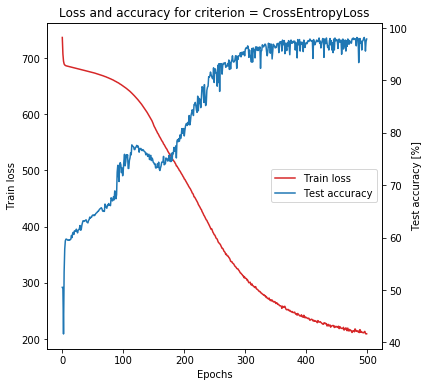

In [4]:
#Training with MSE
print("MSE")
losses, test_accs = train_model_SGD(model, MSE,data,target,data_test,target_test,
                                   mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                    plot_loss=True,plot_points=False)
#Resets weights and retrains with CEL
model.reset_param()
print("CrossEntropyLoss")
losses, test_accs = train_model_SGD(model,CROSS,data,target,data_test,target_test,
                                   mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                    plot_loss=True,plot_points=False)

MSELoss with Softmax activation
0 train_loss 501.51 test_error 56.80%
50 train_loss 491.99 test_error 47.40%
100 train_loss 483.90 test_error 36.90%
150 train_loss 474.28 test_error 34.60%
200 train_loss 459.68 test_error 30.80%
250 train_loss 432.90 test_error 25.60%
300 train_loss 386.62 test_error 21.70%
350 train_loss 316.27 test_error 14.90%
400 train_loss 242.22 test_error 6.90%
450 train_loss 185.49 test_error 5.20%
499 train_loss 148.57 test_error 3.50%


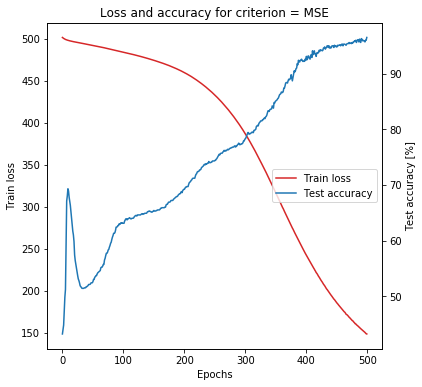

CrossEntropyLoss with Softmax activation
0 train_loss 692.62 test_error 56.70%
50 train_loss 684.07 test_error 35.30%
100 train_loss 681.37 test_error 37.80%
150 train_loss 678.65 test_error 38.60%
200 train_loss 675.39 test_error 38.70%
250 train_loss 671.39 test_error 39.30%
300 train_loss 665.21 test_error 39.20%
350 train_loss 656.74 test_error 36.90%
400 train_loss 646.54 test_error 30.80%
450 train_loss 633.71 test_error 28.40%
499 train_loss 618.21 test_error 28.00%


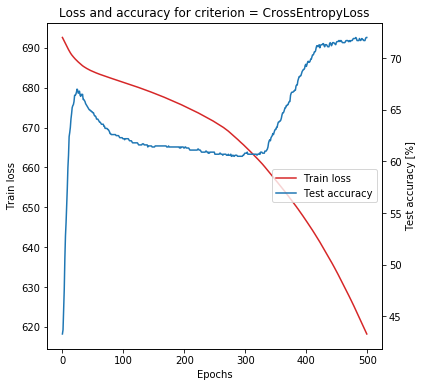

In [5]:
#Testing Softmax as activation
#Hyperparameters
lr = 2e-4
wd = 1e-6

#reset parameters to "unlearn" the parameters in linear since it's the same instances
model2.reset_param() 
print("MSELoss with Softmax activation")
losses, test_accs = train_model_SGD(model2,MSE,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                plot_loss=True,plot_points=False)

print("CrossEntropyLoss with Softmax activation")
model2.reset_param()
losses, test_accs = train_model_SGD(model2,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                plot_loss=True,plot_points=False)


CrossEntropyLoss with Softmax activation, no weight decay, eta = 0.001
0 train_loss 702.88 test_error 49.50%
50 train_loss 675.05 test_error 39.60%
100 train_loss 634.80 test_error 28.60%
150 train_loss 576.89 test_error 28.10%
200 train_loss 538.63 test_error 23.40%
250 train_loss 508.49 test_error 21.40%
300 train_loss 431.54 test_error 7.70%
350 train_loss 392.97 test_error 3.80%
400 train_loss 375.65 test_error 3.00%
450 train_loss 365.21 test_error 2.80%
499 train_loss 360.79 test_error 3.10%


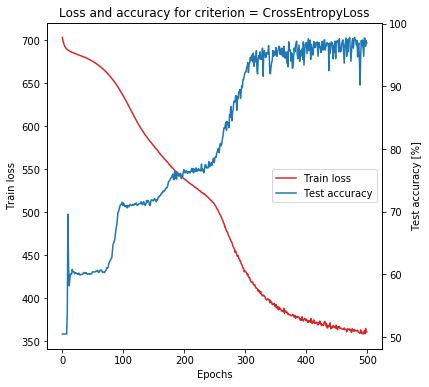

In [9]:
model2.reset_param()
lr = 1e-3
wd = 1e-7
print("CrossEntropyLoss with Softmax activation, wd=1e-7, eta = {}".format(lr))
losses, test_accs = train_model_SGD(model2,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                plot_loss=True,plot_points=False)

CrossEntropyLoss with Softmax activation, Weight decay = 5e-07, eta = 0.003
0 train_loss 692.43 test_error 50.50%
50 train_loss 503.65 test_error 15.00%
100 train_loss 378.49 test_error 6.60%
150 train_loss 364.95 test_error 2.60%
200 train_loss 355.65 test_error 8.20%
250 train_loss 357.92 test_error 1.60%
300 train_loss 344.60 test_error 3.50%
350 train_loss 347.44 test_error 2.90%
400 train_loss 349.27 test_error 4.10%
450 train_loss 351.26 test_error 3.20%
499 train_loss 345.61 test_error 1.20%


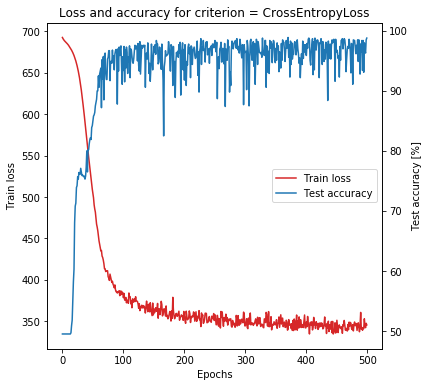

In [10]:
model2.reset_param()
lr = 3e-3
wd = 5e-7
print("CrossEntropyLoss with Softmax activation, Weight decay = {}, eta = {}".format(wd,lr))
losses, test_accs = train_model_SGD(model2,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd,
                                plot_loss=True,plot_points=False)

CrossEntropyLoss with Softmax activation, Weight decay = 5e-07, eta = 0.005
Learning rate decay every 50 epochs : 0.8
0 train_loss 691.91 test_error 39.80%
50 train_loss 378.09 test_error 8.10%
100 train_loss 365.40 test_error 1.40%
150 train_loss 365.58 test_error 1.40%
200 train_loss 365.77 test_error 1.40%
250 train_loss 365.96 test_error 1.40%
300 train_loss 366.15 test_error 1.40%
350 train_loss 366.34 test_error 1.40%
400 train_loss 366.53 test_error 1.40%
450 train_loss 366.72 test_error 1.40%
499 train_loss 366.90 test_error 1.40%


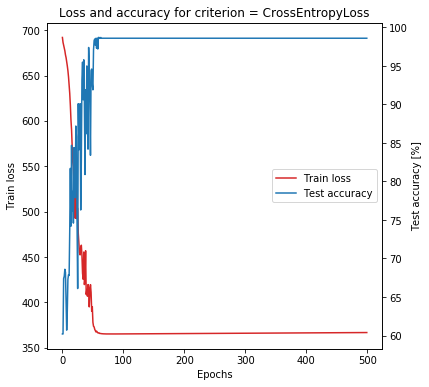

In [5]:
model2.reset_param()
lr = 5e-3
wd = 5e-7
#learning rate decay over every 50 epochs = adaptive
adaptive = 0.8
print("CrossEntropyLoss with Softmax activation, Weight decay = {}, eta = {}".format(wd,lr))
print("Learning rate decay every 50 epochs : {}".format(adaptive))
losses, test_accs = train_model_SGD(model2,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd, adaptive = adaptive,
                                plot_loss=True,plot_points=False)

CrossEntropyLoss with Softmax activation, Weight decay = 1e-07, eta = 0.05
Learning rate decay every 50 epochs : 0.9
0 train_loss 696.13 test_error 38.00%
50 train_loss 478.90 test_error 16.60%
100 train_loss 351.12 test_error 1.60%
150 train_loss 350.68 test_error 1.60%
200 train_loss 350.69 test_error 1.60%
250 train_loss 350.70 test_error 1.60%
300 train_loss 350.72 test_error 1.60%
350 train_loss 350.73 test_error 1.60%
400 train_loss 350.74 test_error 1.60%
450 train_loss 350.76 test_error 1.60%
499 train_loss 350.77 test_error 1.60%


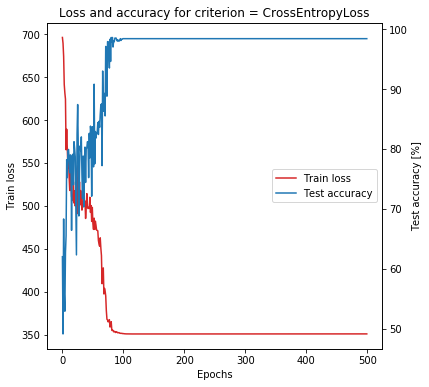

In [9]:
model2.reset_param()
lr = 5e-2
wd = 1e-7
mini_batch_size = 100
#learning rate decay over every 50 epochs = adaptive
adaptive = 0.9
print("CrossEntropyLoss with Softmax activation, Weight decay = {}, eta = {}".format(wd,lr))
print("Learning rate decay every 50 epochs : {}".format(adaptive))
losses, test_accs = train_model_SGD(model2,CROSS,data,target,data_test,target_test,
                               mini_batch_size,nb_epochs,eta = lr, wd=wd, adaptive = adaptive,
                                plot_loss=True,plot_points=False)

Parameters :  ReLu MSE Learning Rate = 0.1, Adaptive = False
0 train_loss 373550054386.11 test_error 51.30%
50 train_loss 1000.00 test_error 51.30%
100 train_loss 1000.00 test_error 51.30%
150 train_loss 1000.00 test_error 51.30%
200 train_loss 1000.00 test_error 51.30%
250 train_loss 1000.00 test_error 51.30%
300 train_loss 1000.00 test_error 51.30%
350 train_loss 1000.00 test_error 51.30%
400 train_loss 1000.00 test_error 51.30%
450 train_loss 1000.00 test_error 51.30%
499 train_loss 1000.00 test_error 51.30%


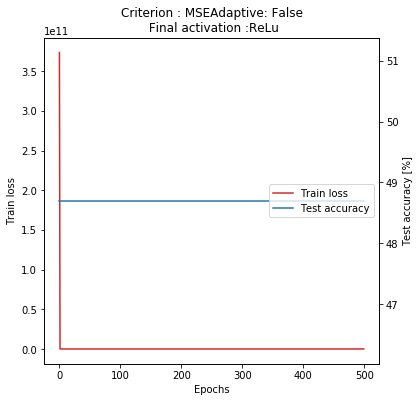

Parameters :  ReLu MSE Learning Rate = 0.1, Adaptive = 0.9
0 train_loss 13590.35 test_error 51.30%
50 train_loss 1000.00 test_error 51.30%
100 train_loss 1000.00 test_error 51.30%
150 train_loss 1000.00 test_error 51.30%
200 train_loss 1000.00 test_error 51.30%
250 train_loss 1000.00 test_error 51.30%
300 train_loss 1000.00 test_error 51.30%
350 train_loss 1000.00 test_error 51.30%
400 train_loss 1000.00 test_error 51.30%
450 train_loss 1000.00 test_error 51.30%
499 train_loss 1000.00 test_error 51.30%


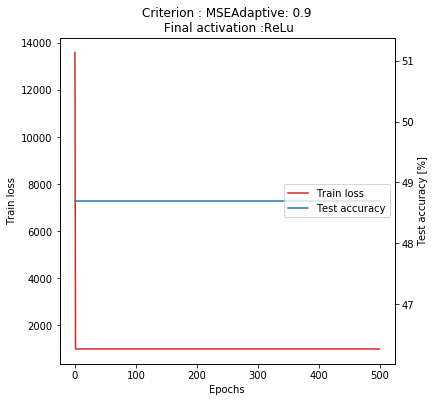

Parameters :  ReLu MSE Learning Rate = 0.01, Adaptive = False
0 train_loss 4635.41 test_error 51.30%
50 train_loss 1000.00 test_error 51.30%
100 train_loss 1000.00 test_error 51.30%
150 train_loss 1000.00 test_error 51.30%
200 train_loss 1000.00 test_error 51.30%
250 train_loss 1000.00 test_error 51.30%
300 train_loss 1000.00 test_error 51.30%
350 train_loss 1000.00 test_error 51.30%
400 train_loss 1000.00 test_error 51.30%
450 train_loss 1000.00 test_error 51.30%
499 train_loss 1000.00 test_error 51.30%


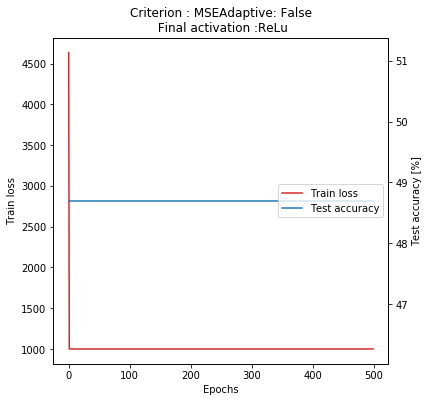

Parameters :  ReLu MSE Learning Rate = 0.01, Adaptive = 0.9
0 train_loss 1420.28 test_error 51.30%
50 train_loss 1000.00 test_error 51.30%
100 train_loss 1000.00 test_error 51.30%
150 train_loss 1000.00 test_error 51.30%
200 train_loss 1000.00 test_error 51.30%
250 train_loss 1000.00 test_error 51.30%
300 train_loss 1000.00 test_error 51.30%
350 train_loss 1000.00 test_error 51.30%


In [ ]:
nb_epochs = 500
wd = 1e-7
mini_batch_size = 100

for activation in [relu, tanh, softmax]:
    for criterion in [MSE, CROSS]:
        for lr in [1e-1,1e-2,1e-3]:
            for adaptive in [False, 0.9]:
                print("Activation : {}, Criterion : {}".format((str(activation)[str(activation).find('.')+1:str(activation).find(" ")]), 
                      str(criterion)[str(criterion).find('.')+1:str(criterion).find(" ")]), 
                      "\n Learning Rate = {}, Adaptive = {}".format(lr, adaptive))
                model = Sequential.Sequential(m1, relu, m2, relu, m3, tanh, m4, activation)
                model.reset_param()
                _,_ = train_model_SGD(model,criterion, 
                                      data,target,data_test,target_test,
                                      mini_batch_size,nb_epochs,eta = lr, wd=wd, adaptive = adaptive,
                                      plot_loss=True,plot_points=False)


#### Hidden gridsearch cells below

Eta = 1e-05,Batchsize = 50,wd = False, Final Test acc : 
0 train_loss 733.92 test_error 51.00%
50 train_loss 695.84 test_error 53.60%
100 train_loss 689.76 test_error 50.30%
150 train_loss 687.68 test_error 45.60%
200 train_loss 686.11 test_error 45.40%
250 train_loss 684.68 test_error 44.30%
300 train_loss 683.33 test_error 43.20%
350 train_loss 681.99 test_error 42.80%
400 train_loss 680.64 test_error 42.00%
450 train_loss 679.27 test_error 41.40%
499 train_loss 677.89 test_error 40.40%


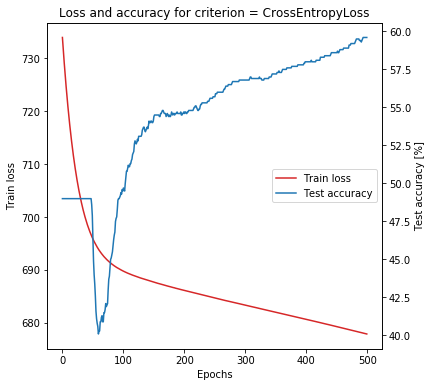

Eta = 1e-05,Batchsize = 50,wd = 3e-05, Final Test acc : 
0 train_loss 711.37 test_error 49.00%
50 train_loss 697.50 test_error 41.00%
100 train_loss 695.23 test_error 43.40%
150 train_loss 694.20 test_error 42.60%
200 train_loss 693.61 test_error 40.80%
250 train_loss 693.26 test_error 40.30%
300 train_loss 693.08 test_error 46.30%
350 train_loss 692.99 test_error 49.00%
400 train_loss 692.99 test_error 49.00%
450 train_loss 693.05 test_error 49.00%
499 train_loss 693.12 test_error 49.00%


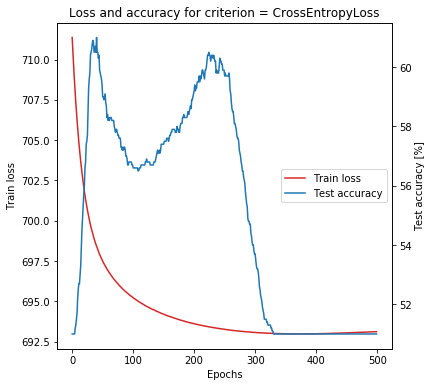

Eta = 1e-05,Batchsize = 50,wd = 6e-05, Final Test acc : 
0 train_loss 694.99 test_error 49.00%
50 train_loss 693.75 test_error 49.00%
100 train_loss 694.00 test_error 49.00%
150 train_loss 694.63 test_error 49.00%
200 train_loss 695.18 test_error 49.00%
250 train_loss 695.53 test_error 49.00%
300 train_loss 695.70 test_error 49.00%
350 train_loss 695.66 test_error 49.00%
400 train_loss 695.48 test_error 49.00%
450 train_loss 695.24 test_error 49.00%
499 train_loss 694.98 test_error 49.00%


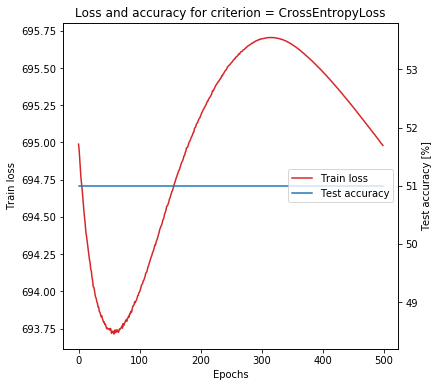

Eta = 1e-05,Batchsize = 100,wd = False, Final Test acc : 
0 train_loss 705.45 test_error 51.00%
50 train_loss 697.93 test_error 52.60%
100 train_loss 696.36 test_error 60.10%
150 train_loss 695.32 test_error 48.10%
200 train_loss 694.37 test_error 46.00%
250 train_loss 693.44 test_error 43.70%
300 train_loss 692.54 test_error 40.60%
350 train_loss 691.62 test_error 38.80%
400 train_loss 690.69 test_error 37.10%
450 train_loss 689.74 test_error 35.90%
499 train_loss 688.78 test_error 34.90%


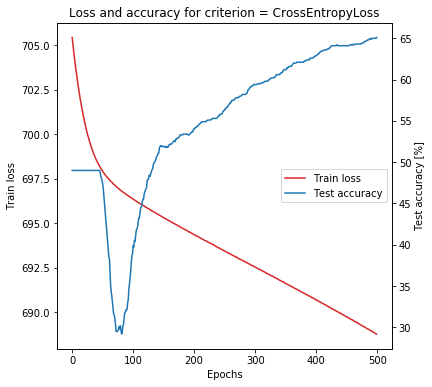

Eta = 1e-05,Batchsize = 100,wd = 3e-05, Final Test acc : 
0 train_loss 692.66 test_error 51.00%
50 train_loss 686.90 test_error 51.00%
100 train_loss 685.77 test_error 43.80%
150 train_loss 685.54 test_error 37.80%
200 train_loss 685.57 test_error 37.80%
250 train_loss 685.71 test_error 37.00%
300 train_loss 685.92 test_error 37.10%
350 train_loss 686.17 test_error 36.80%
400 train_loss 686.46 test_error 36.60%
450 train_loss 686.79 test_error 36.50%
499 train_loss 687.14 test_error 36.10%


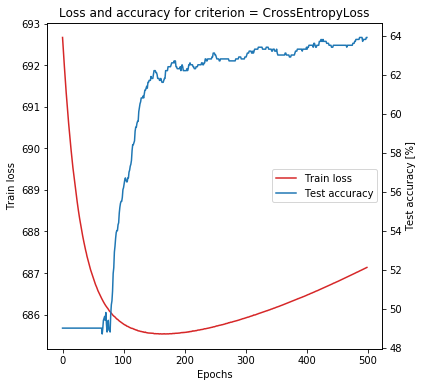

Eta = 1e-05,Batchsize = 100,wd = 6e-05, Final Test acc : 
0 train_loss 750.38 test_error 49.00%
50 train_loss 703.35 test_error 49.00%
100 train_loss 695.67 test_error 49.00%
150 train_loss 693.66 test_error 49.00%
200 train_loss 693.03 test_error 49.00%
250 train_loss 692.95 test_error 49.00%
300 train_loss 693.09 test_error 49.00%
350 train_loss 693.34 test_error 49.00%
400 train_loss 693.61 test_error 49.00%
450 train_loss 693.86 test_error 49.00%
499 train_loss 694.08 test_error 49.00%


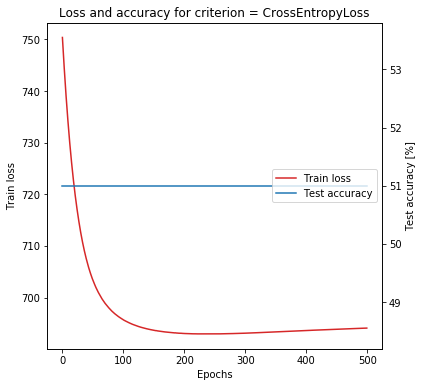

Eta = 1e-05,Batchsize = 100,wd = 6e-05, Final Test acc :  51.0
Eta = 0.0011200000000000001,Batchsize = 50,wd = False, Final Test acc : 
0 train_loss 698.54 test_error 41.60%
50 train_loss 278.86 test_error 7.20%
100 train_loss 216.16 test_error 3.50%
150 train_loss 205.92 test_error 3.40%
200 train_loss 197.22 test_error 4.30%
250 train_loss 201.47 test_error 1.90%
300 train_loss 197.01 test_error 9.00%
350 train_loss 195.25 test_error 2.00%
400 train_loss 185.85 test_error 2.50%
450 train_loss 180.27 test_error 2.70%
499 train_loss 163.85 test_error 2.80%


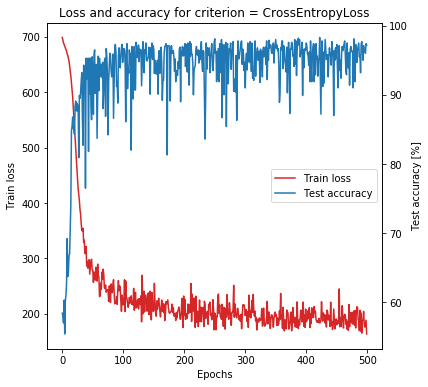

Eta = 0.0011200000000000001,Batchsize = 50,wd = 3e-05, Final Test acc : 
0 train_loss 733.79 test_error 56.60%
50 train_loss 331.12 test_error 19.50%
100 train_loss 231.63 test_error 4.10%
150 train_loss 207.27 test_error 2.70%
200 train_loss 205.05 test_error 14.60%
250 train_loss 198.77 test_error 2.60%
300 train_loss 182.20 test_error 6.40%
350 train_loss 202.04 test_error 4.10%
400 train_loss 206.91 test_error 5.10%
450 train_loss 205.75 test_error 4.60%
499 train_loss 187.36 test_error 5.00%


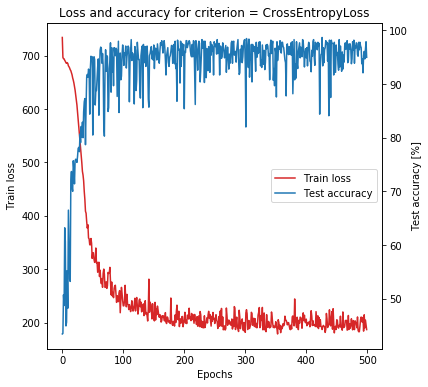

Eta = 0.0011200000000000001,Batchsize = 50,wd = 6e-05, Final Test acc : 
0 train_loss 690.06 test_error 39.90%
50 train_loss 280.97 test_error 6.00%
100 train_loss 233.95 test_error 7.40%
150 train_loss 245.91 test_error 2.80%
200 train_loss 239.56 test_error 11.00%
250 train_loss 270.74 test_error 4.60%
300 train_loss 246.27 test_error 2.80%
350 train_loss 258.65 test_error 5.30%
400 train_loss 257.20 test_error 8.30%
450 train_loss 243.15 test_error 8.20%
499 train_loss 250.14 test_error 8.80%


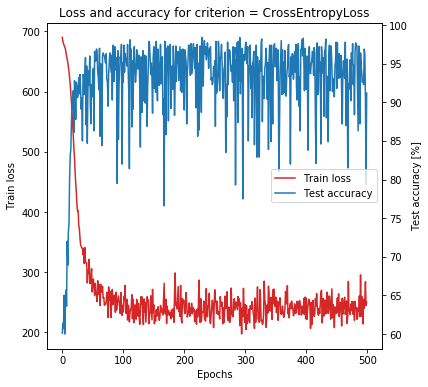

Eta = 0.0011200000000000001,Batchsize = 100,wd = False, Final Test acc : 
0 train_loss 705.69 test_error 49.00%
50 train_loss 439.84 test_error 14.10%
100 train_loss 299.18 test_error 5.40%
150 train_loss 259.63 test_error 5.80%
200 train_loss 247.95 test_error 8.40%
250 train_loss 230.12 test_error 11.00%
300 train_loss 262.08 test_error 4.20%
350 train_loss 254.23 test_error 6.00%
400 train_loss 232.20 test_error 16.60%
450 train_loss 193.76 test_error 3.60%
499 train_loss 228.52 test_error 6.90%


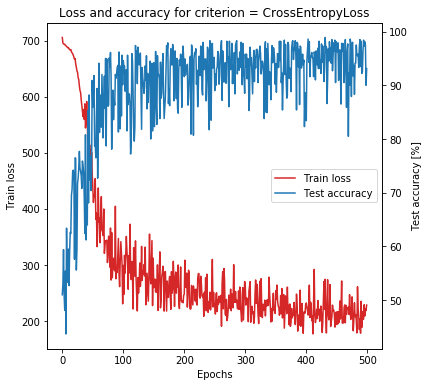

Eta = 0.0011200000000000001,Batchsize = 100,wd = 3e-05, Final Test acc : 
0 train_loss 702.38 test_error 46.60%
50 train_loss 297.47 test_error 16.20%
100 train_loss 294.40 test_error 5.80%
150 train_loss 233.98 test_error 4.70%
200 train_loss 226.93 test_error 2.20%
250 train_loss 241.42 test_error 8.60%
300 train_loss 233.64 test_error 7.10%
350 train_loss 214.15 test_error 7.80%
400 train_loss 249.08 test_error 3.90%
450 train_loss 190.41 test_error 5.90%
499 train_loss 232.95 test_error 6.30%


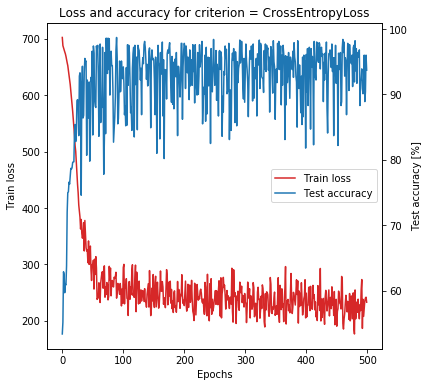

Eta = 0.0011200000000000001,Batchsize = 100,wd = 6e-05, Final Test acc : 
0 train_loss 689.70 test_error 34.80%
50 train_loss 352.87 test_error 20.70%
100 train_loss 291.91 test_error 6.90%
150 train_loss 220.69 test_error 17.90%
200 train_loss 252.23 test_error 3.80%
250 train_loss 261.17 test_error 8.30%
300 train_loss 271.18 test_error 2.40%
350 train_loss 251.48 test_error 10.50%
400 train_loss 241.36 test_error 1.90%
450 train_loss 253.39 test_error 3.90%
499 train_loss 190.85 test_error 7.20%


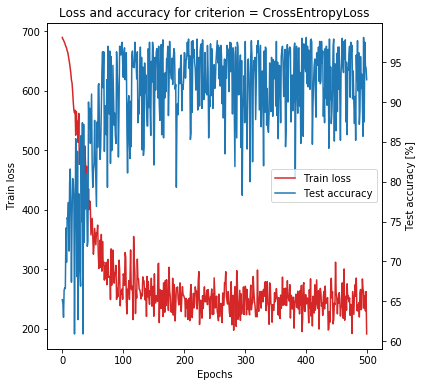

Eta = 0.0011200000000000001,Batchsize = 100,wd = 6e-05, Final Test acc :  92.8
Eta = 0.00223,Batchsize = 50,wd = False, Final Test acc : 
0 train_loss 705.37 test_error 57.10%
50 train_loss 258.55 test_error 10.00%
100 train_loss 241.65 test_error 3.20%
150 train_loss 205.83 test_error 6.70%
200 train_loss 225.02 test_error 5.20%
250 train_loss 211.73 test_error 6.60%
300 train_loss 196.38 test_error 2.10%
350 train_loss 198.95 test_error 3.80%
400 train_loss 174.72 test_error 6.70%
450 train_loss 170.95 test_error 1.90%
499 train_loss 167.95 test_error 2.10%


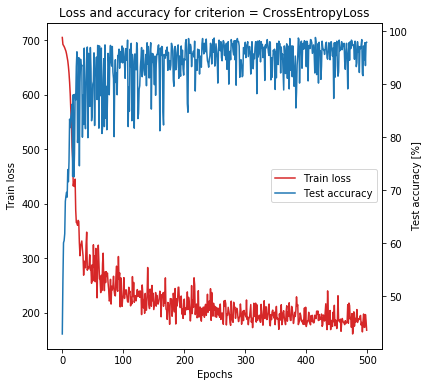

Eta = 0.00223,Batchsize = 50,wd = 3e-05, Final Test acc : 
0 train_loss 720.70 test_error 52.90%
50 train_loss 333.44 test_error 5.70%
100 train_loss 269.57 test_error 10.80%


KeyboardInterrupt: 

In [4]:
#GRID1
for lr in np.linspace(1e-5,1e-2,10):
    for b in [50,100]:
        for wd in [False,3e-5,6e-5]:
            #reset parameters to "unlearn"
            model.reset_param()
            print("Eta = {},Batchsize = {},wd = {}, Final Test acc : ".format(lr,b,wd))
            losses, test_accs = train_model_SGD(model,CROSS,data,target,data_test,target_test,
                                           b,nb_epochs,eta = lr, wd=wd,
                                            plot_loss=True,plot_points=False)
    print("Eta = {},Batchsize = {},wd = {}, Final Test acc : ".format(lr,b,wd), test_accs[-1])

0 train_loss 699.18 test_error 60.10%
50 train_loss 684.13 test_error 39.00%
100 train_loss 673.75 test_error 28.90%
150 train_loss 657.03 test_error 26.40%
200 train_loss 628.22 test_error 24.60%
250 train_loss 582.06 test_error 23.90%
300 train_loss 528.76 test_error 23.50%
350 train_loss 477.46 test_error 21.00%
400 train_loss 421.82 test_error 17.30%
450 train_loss 365.16 test_error 10.90%
499 train_loss 315.94 test_error 4.30%


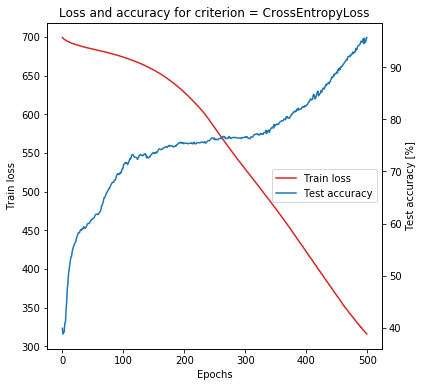

Eta = 0.0001,Batchsize = 50,wd = False, Final Test acc :  95.7
0 train_loss 773.12 test_error 49.00%
50 train_loss 687.06 test_error 39.00%
100 train_loss 677.60 test_error 27.40%
150 train_loss 668.38 test_error 22.00%
200 train_loss 658.24 test_error 24.40%
250 train_loss 646.24 test_error 25.50%
300 train_loss 631.18 test_error 24.80%
350 train_loss 612.45 test_error 24.50%
400 train_loss 591.39 test_error 23.80%
450 train_loss 569.03 test_error 23.70%
499 train_loss 546.29 test_error 24.00%


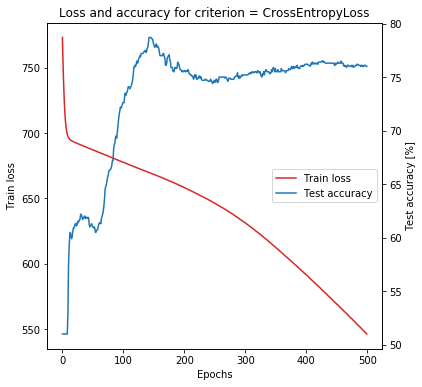

Eta = 0.0001,Batchsize = 50,wd = 3e-05, Final Test acc :  76.0
0 train_loss 697.10 test_error 51.00%
50 train_loss 692.82 test_error 51.00%
100 train_loss 695.55 test_error 51.00%
150 train_loss 694.63 test_error 51.00%
200 train_loss 693.76 test_error 51.00%
250 train_loss 693.39 test_error 51.00%
300 train_loss 693.24 test_error 51.00%
350 train_loss 693.19 test_error 51.00%
400 train_loss 693.16 test_error 51.00%
450 train_loss 693.15 test_error 51.00%
499 train_loss 693.15 test_error 51.00%


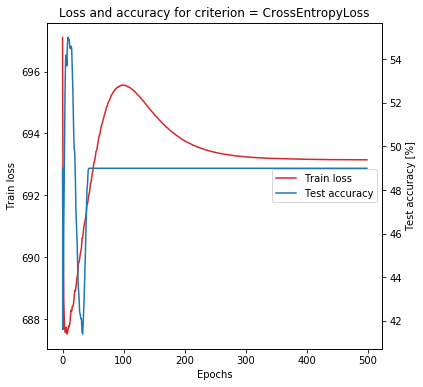

Eta = 0.0001,Batchsize = 50,wd = 0.0003, Final Test acc :  49.0
0 train_loss 724.41 test_error 49.00%
50 train_loss 688.24 test_error 49.60%
100 train_loss 676.46 test_error 43.90%
150 train_loss 656.67 test_error 39.50%
200 train_loss 620.41 test_error 34.70%
250 train_loss 555.75 test_error 18.50%
300 train_loss 476.00 test_error 16.20%
350 train_loss 403.06 test_error 11.40%
400 train_loss 343.75 test_error 6.70%
450 train_loss 300.94 test_error 4.40%
499 train_loss 272.89 test_error 3.90%


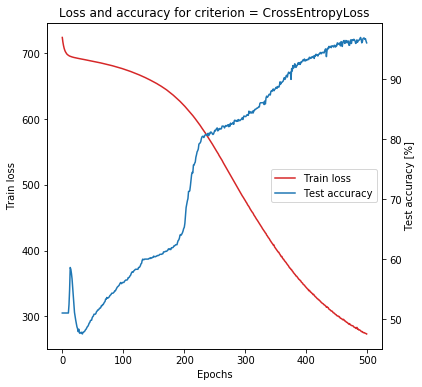

Eta = 0.0001,Batchsize = 100,wd = False, Final Test acc :  96.1
0 train_loss 695.04 test_error 51.00%
50 train_loss 673.89 test_error 27.90%
100 train_loss 660.40 test_error 30.00%
150 train_loss 640.16 test_error 26.40%
200 train_loss 606.04 test_error 22.00%
250 train_loss 552.64 test_error 19.60%
300 train_loss 491.75 test_error 15.00%
350 train_loss 429.37 test_error 9.70%
400 train_loss 375.80 test_error 6.10%
450 train_loss 336.50 test_error 4.80%
499 train_loss 309.91 test_error 3.70%


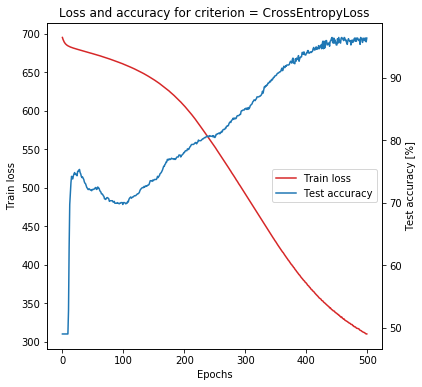

Eta = 0.0001,Batchsize = 100,wd = 3e-05, Final Test acc :  96.3
0 train_loss 770.16 test_error 51.00%
50 train_loss 690.55 test_error 56.40%
100 train_loss 692.29 test_error 51.00%
150 train_loss 693.48 test_error 51.00%
200 train_loss 693.85 test_error 51.00%
250 train_loss 693.80 test_error 51.00%
300 train_loss 693.63 test_error 51.00%
350 train_loss 693.49 test_error 51.00%
400 train_loss 693.38 test_error 51.00%
450 train_loss 693.30 test_error 51.00%
499 train_loss 693.25 test_error 51.00%


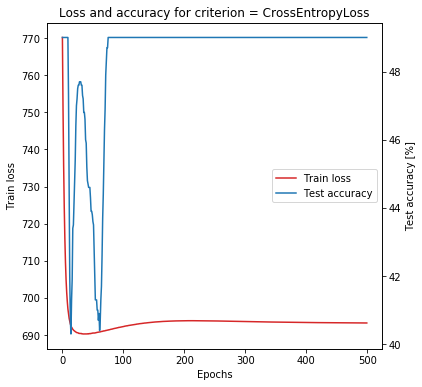

Eta = 0.0001,Batchsize = 100,wd = 0.0003, Final Test acc :  49.0
0 train_loss 699.43 test_error 42.60%
50 train_loss 321.74 test_error 16.40%
100 train_loss 298.87 test_error 9.80%
150 train_loss 285.71 test_error 14.50%
200 train_loss 288.69 test_error 6.90%
250 train_loss 255.47 test_error 6.50%
300 train_loss 201.97 test_error 7.60%
350 train_loss 191.01 test_error 3.70%
400 train_loss 212.59 test_error 7.70%
450 train_loss 201.21 test_error 3.60%
499 train_loss 179.92 test_error 3.90%


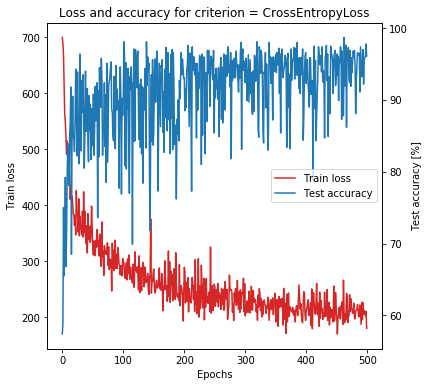

Eta = 0.0112,Batchsize = 50,wd = False, Final Test acc :  96.1
0 train_loss 686.47 test_error 37.60%
50 train_loss 339.74 test_error 10.00%
100 train_loss 310.59 test_error 10.00%
150 train_loss 254.46 test_error 16.40%
200 train_loss 286.60 test_error 5.00%
250 train_loss 240.17 test_error 7.20%
300 train_loss 247.76 test_error 4.20%
350 train_loss 264.70 test_error 11.50%
400 train_loss 217.54 test_error 7.70%
450 train_loss 248.03 test_error 12.80%
499 train_loss 247.16 test_error 5.60%


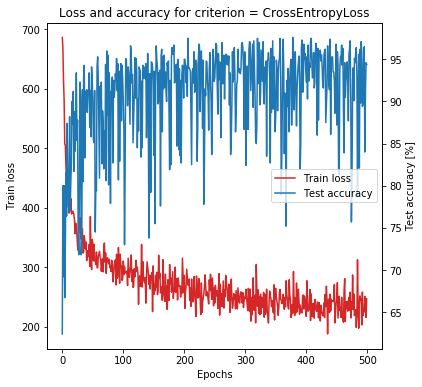

Eta = 0.0112,Batchsize = 50,wd = 3e-05, Final Test acc :  94.4
0 train_loss 687.08 test_error 51.00%
50 train_loss 360.97 test_error 24.40%
100 train_loss 329.85 test_error 13.20%
150 train_loss 349.58 test_error 18.40%
200 train_loss 303.54 test_error 5.10%
250 train_loss 303.93 test_error 20.90%
300 train_loss 313.83 test_error 16.90%
350 train_loss 307.40 test_error 16.70%
400 train_loss 290.40 test_error 25.80%
450 train_loss 302.05 test_error 15.80%
499 train_loss 306.07 test_error 11.60%


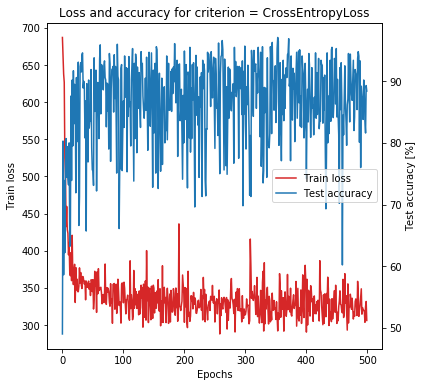

Eta = 0.0112,Batchsize = 50,wd = 0.0003, Final Test acc :  88.4
0 train_loss 704.61 test_error 46.90%
50 train_loss 369.91 test_error 25.10%
100 train_loss 353.13 test_error 16.00%
150 train_loss 363.19 test_error 5.50%
200 train_loss 317.94 test_error 13.00%
250 train_loss 314.13 test_error 11.70%
300 train_loss 330.15 test_error 11.90%
350 train_loss 293.36 test_error 12.20%
400 train_loss 282.68 test_error 10.00%
450 train_loss 255.77 test_error 5.30%
499 train_loss 310.93 test_error 5.50%


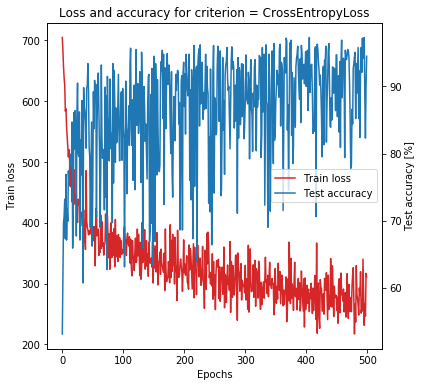

Eta = 0.0112,Batchsize = 100,wd = False, Final Test acc :  94.5
0 train_loss 696.64 test_error 36.40%
50 train_loss 392.33 test_error 37.60%
100 train_loss 384.42 test_error 9.40%
150 train_loss 346.16 test_error 18.30%
200 train_loss 311.56 test_error 10.50%
250 train_loss 269.11 test_error 9.80%
300 train_loss 297.94 test_error 24.30%
350 train_loss 309.78 test_error 7.20%
400 train_loss 338.16 test_error 10.20%
450 train_loss 282.54 test_error 7.20%
499 train_loss 290.66 test_error 7.00%


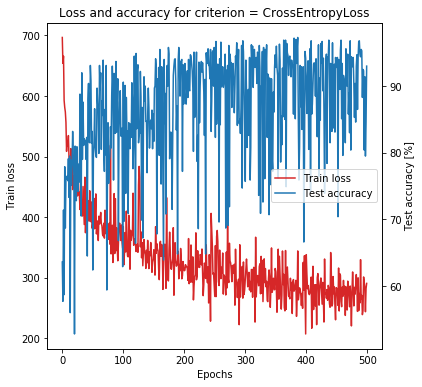

Eta = 0.0112,Batchsize = 100,wd = 3e-05, Final Test acc :  93.0
0 train_loss 723.58 test_error 51.00%
50 train_loss 369.31 test_error 20.60%
100 train_loss 354.64 test_error 20.40%
150 train_loss 336.24 test_error 11.00%
200 train_loss 379.38 test_error 15.40%
250 train_loss 351.65 test_error 20.60%
300 train_loss 345.99 test_error 15.60%
350 train_loss 362.07 test_error 8.60%
400 train_loss 344.77 test_error 7.80%
450 train_loss 374.73 test_error 19.30%
499 train_loss 342.52 test_error 16.60%


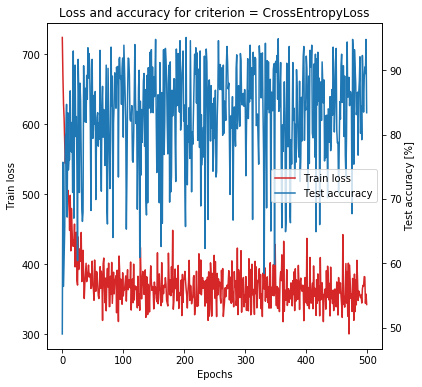

Eta = 0.0112,Batchsize = 100,wd = 0.0003, Final Test acc :  83.4
0 train_loss 685.33 test_error 44.80%
50 train_loss 397.47 test_error 15.90%
100 train_loss 278.11 test_error 6.50%
150 train_loss 325.21 test_error 12.70%
200 train_loss 242.81 test_error 7.20%
250 train_loss 234.41 test_error 3.30%
300 train_loss 251.70 test_error 6.50%
350 train_loss 233.36 test_error 2.90%
400 train_loss 200.03 test_error 4.60%
450 train_loss 180.71 test_error 7.10%
499 train_loss 207.24 test_error 4.40%


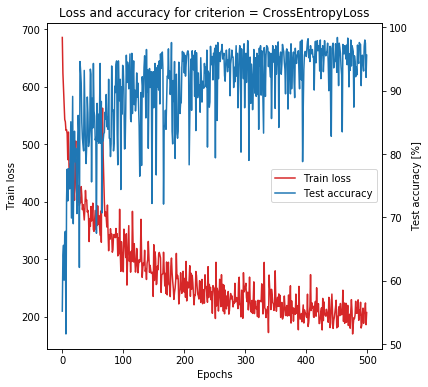

Eta = 0.0223,Batchsize = 50,wd = False, Final Test acc :  95.6
0 train_loss 702.83 test_error 49.00%
50 train_loss 338.12 test_error 8.80%
100 train_loss 333.25 test_error 9.10%
150 train_loss 275.48 test_error 9.40%
200 train_loss 271.36 test_error 8.20%
250 train_loss 273.33 test_error 13.00%
300 train_loss 249.15 test_error 5.30%
350 train_loss 230.87 test_error 4.20%
400 train_loss 217.76 test_error 11.20%
450 train_loss 202.28 test_error 4.40%
499 train_loss 237.86 test_error 6.10%


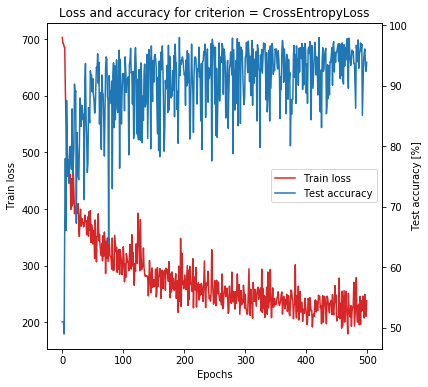

Eta = 0.0223,Batchsize = 50,wd = 3e-05, Final Test acc :  93.9
0 train_loss 689.51 test_error 36.10%
50 train_loss 384.81 test_error 11.30%
100 train_loss 381.85 test_error 7.80%
150 train_loss 431.55 test_error 18.50%
200 train_loss 381.99 test_error 14.30%
250 train_loss 363.93 test_error 18.20%
300 train_loss 353.04 test_error 20.00%
350 train_loss 361.97 test_error 19.50%
400 train_loss 351.98 test_error 13.50%
450 train_loss 329.92 test_error 17.10%
499 train_loss 455.51 test_error 12.70%


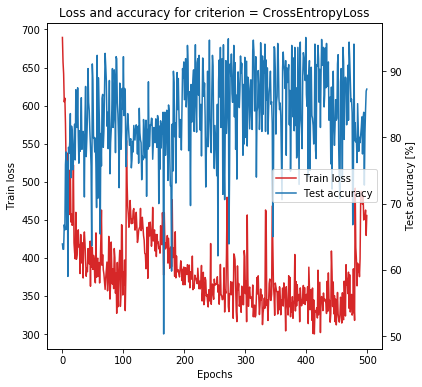

Eta = 0.0223,Batchsize = 50,wd = 0.0003, Final Test acc :  87.3
0 train_loss 725.31 test_error 51.00%
50 train_loss 463.13 test_error 20.00%
100 train_loss 397.99 test_error 19.30%
150 train_loss 391.07 test_error 17.10%
200 train_loss 394.62 test_error 16.00%
250 train_loss 354.61 test_error 22.10%
300 train_loss 350.12 test_error 28.80%
350 train_loss 331.01 test_error 20.00%
400 train_loss 335.91 test_error 11.00%
450 train_loss 319.17 test_error 7.50%
499 train_loss 335.29 test_error 21.70%


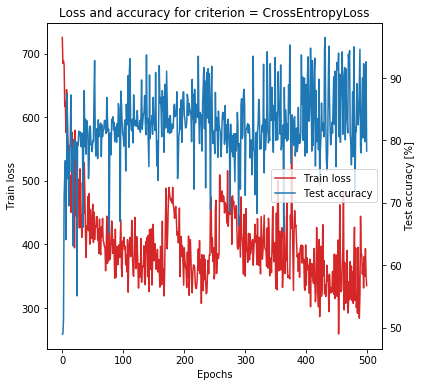

Eta = 0.0223,Batchsize = 100,wd = False, Final Test acc :  78.3
0 train_loss 751.11 test_error 49.00%
50 train_loss 474.91 test_error 19.60%
100 train_loss 434.30 test_error 17.10%
150 train_loss 406.43 test_error 16.30%
200 train_loss 397.58 test_error 32.20%
250 train_loss 488.12 test_error 20.20%
300 train_loss 343.23 test_error 15.90%
350 train_loss 359.67 test_error 18.00%
400 train_loss 411.32 test_error 16.30%
450 train_loss 459.53 test_error 21.20%
499 train_loss 368.89 test_error 9.40%


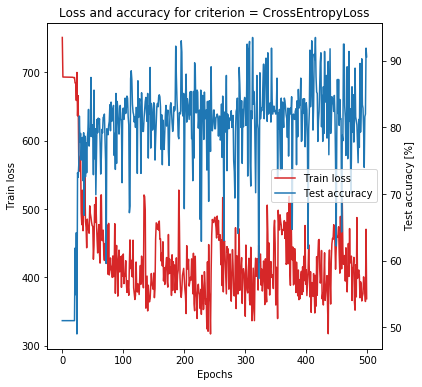

Eta = 0.0223,Batchsize = 100,wd = 3e-05, Final Test acc :  90.6
0 train_loss 712.04 test_error 51.00%
50 train_loss 455.91 test_error 35.80%
100 train_loss 408.88 test_error 19.40%
150 train_loss 403.92 test_error 18.80%
200 train_loss 404.10 test_error 18.70%
250 train_loss 386.61 test_error 28.90%
300 train_loss 409.14 test_error 16.90%
350 train_loss 457.11 test_error 17.30%
400 train_loss 478.07 test_error 19.80%
450 train_loss 460.12 test_error 22.50%
499 train_loss 460.62 test_error 21.20%


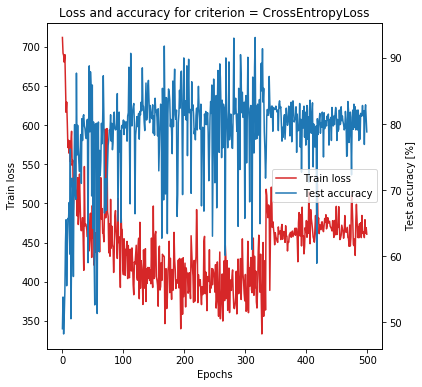

Eta = 0.0223,Batchsize = 100,wd = 0.0003, Final Test acc :  78.8
0 train_loss 697.59 test_error 51.00%
50 train_loss 336.12 test_error 23.30%
100 train_loss 329.54 test_error 12.80%
150 train_loss 301.68 test_error 13.40%
200 train_loss 305.42 test_error 9.30%
250 train_loss 258.64 test_error 4.50%
300 train_loss 219.76 test_error 7.50%
350 train_loss 237.76 test_error 20.60%
400 train_loss 286.35 test_error 4.40%
450 train_loss 255.24 test_error 6.00%
499 train_loss 193.91 test_error 5.00%


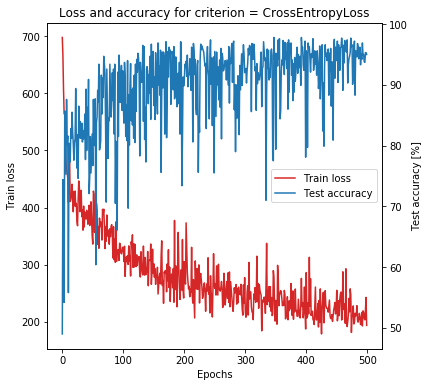

Eta = 0.033400000000000006,Batchsize = 50,wd = False, Final Test acc :  95.0
0 train_loss 697.41 test_error 51.00%
50 train_loss 441.10 test_error 23.20%
100 train_loss 305.58 test_error 11.00%
150 train_loss 334.82 test_error 6.90%
200 train_loss 281.48 test_error 17.10%
250 train_loss 288.38 test_error 16.10%
300 train_loss 260.21 test_error 5.00%
350 train_loss 254.58 test_error 5.80%
400 train_loss 234.32 test_error 6.40%
450 train_loss 223.32 test_error 6.60%
499 train_loss 208.09 test_error 2.20%


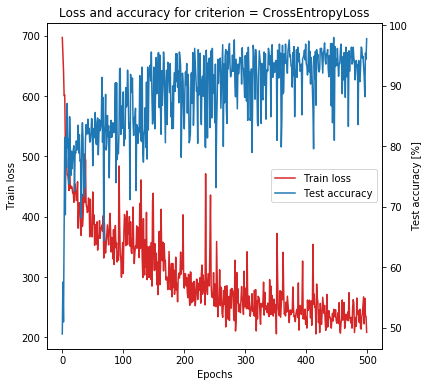

Eta = 0.033400000000000006,Batchsize = 50,wd = 3e-05, Final Test acc :  97.8
0 train_loss 690.61 test_error 44.30%
50 train_loss 496.61 test_error 17.90%
100 train_loss 476.33 test_error 18.10%
150 train_loss 457.66 test_error 23.80%
200 train_loss 452.01 test_error 17.00%
250 train_loss 491.97 test_error 17.60%
300 train_loss 475.57 test_error 17.30%
350 train_loss 454.00 test_error 19.30%
400 train_loss 469.22 test_error 18.00%
450 train_loss 454.08 test_error 15.60%
499 train_loss 469.48 test_error 17.10%


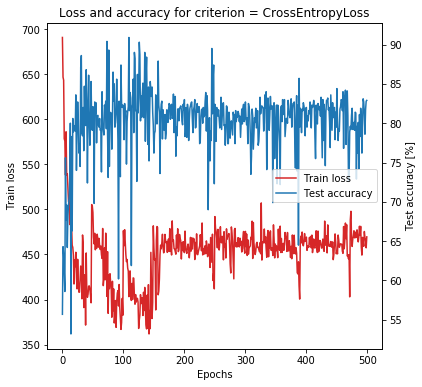

Eta = 0.033400000000000006,Batchsize = 50,wd = 0.0003, Final Test acc :  82.9
0 train_loss 777.56 test_error 51.00%
50 train_loss 554.31 test_error 51.00%
100 train_loss 471.73 test_error 17.90%
150 train_loss 480.37 test_error 20.00%
200 train_loss 462.68 test_error 18.70%
250 train_loss 606.10 test_error 49.00%
300 train_loss 449.79 test_error 21.80%
350 train_loss 693.15 test_error 51.00%
400 train_loss 693.15 test_error 51.00%
450 train_loss 693.15 test_error 51.00%
499 train_loss 693.15 test_error 51.00%


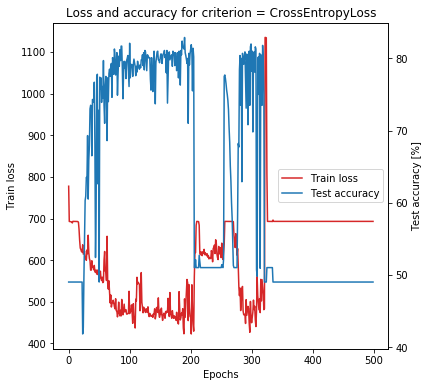

Eta = 0.033400000000000006,Batchsize = 100,wd = False, Final Test acc :  49.0
0 train_loss 684.44 test_error 34.90%
50 train_loss 491.77 test_error 19.00%
100 train_loss 448.40 test_error 18.00%
150 train_loss 451.10 test_error 24.50%
200 train_loss 443.21 test_error 19.50%
250 train_loss 471.45 test_error 18.10%
300 train_loss 430.55 test_error 18.20%
350 train_loss 474.62 test_error 18.30%
400 train_loss 370.55 test_error 21.10%
450 train_loss 504.94 test_error 22.90%
499 train_loss 348.05 test_error 18.60%


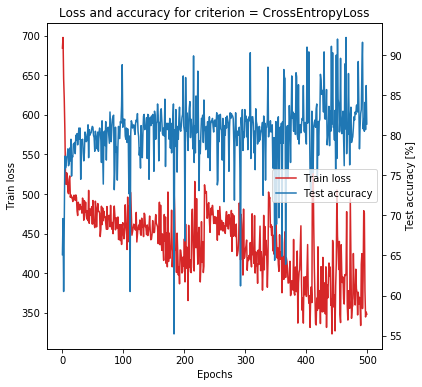

Eta = 0.033400000000000006,Batchsize = 100,wd = 3e-05, Final Test acc :  81.4
0 train_loss 767.86 test_error 49.00%
50 train_loss 617.13 test_error 51.00%
100 train_loss 476.09 test_error 24.90%
150 train_loss 457.84 test_error 20.50%
200 train_loss 471.53 test_error 19.80%
250 train_loss 461.57 test_error 21.40%
300 train_loss 461.17 test_error 20.60%
350 train_loss 471.70 test_error 20.50%
400 train_loss 468.78 test_error 17.60%
450 train_loss 507.48 test_error 19.10%
499 train_loss 465.97 test_error 20.10%


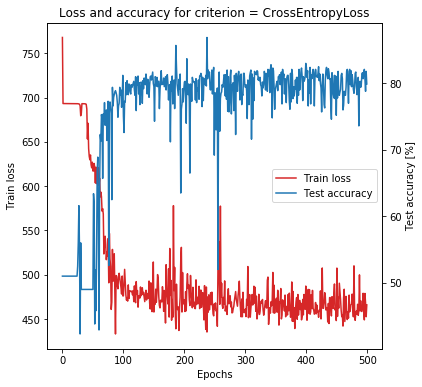

Eta = 0.033400000000000006,Batchsize = 100,wd = 0.0003, Final Test acc :  79.9
0 train_loss 721.31 test_error 51.00%
50 train_loss 423.61 test_error 23.00%
100 train_loss 328.25 test_error 15.80%
150 train_loss 348.22 test_error 10.30%
200 train_loss 478.62 test_error 18.70%
250 train_loss 417.07 test_error 16.40%
300 train_loss 328.10 test_error 7.50%
350 train_loss 438.24 test_error 22.00%
400 train_loss 468.78 test_error 16.80%
450 train_loss 511.82 test_error 20.00%
499 train_loss 460.23 test_error 19.40%


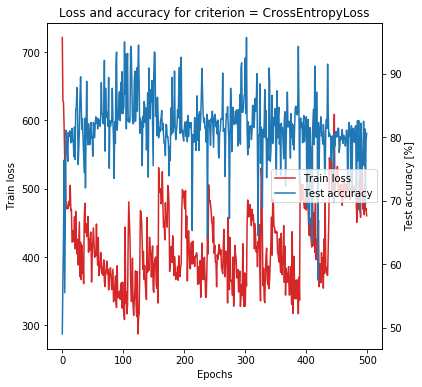

Eta = 0.044500000000000005,Batchsize = 50,wd = False, Final Test acc :  80.6
0 train_loss 704.57 test_error 51.00%
50 train_loss 409.75 test_error 17.80%
100 train_loss 451.93 test_error 17.40%
150 train_loss 435.55 test_error 21.90%
200 train_loss 393.48 test_error 18.30%
250 train_loss 431.97 test_error 17.80%
300 train_loss 372.54 test_error 14.90%
350 train_loss 344.52 test_error 20.50%
400 train_loss 362.20 test_error 30.70%
450 train_loss 367.50 test_error 27.80%
499 train_loss 325.97 test_error 10.10%


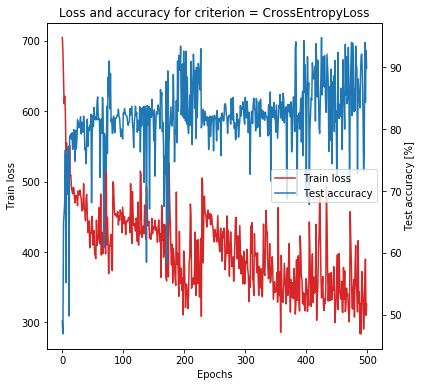

Eta = 0.044500000000000005,Batchsize = 50,wd = 3e-05, Final Test acc :  89.9
0 train_loss 704.97 test_error 49.00%
50 train_loss 436.70 test_error 20.90%
100 train_loss 477.60 test_error 18.50%
150 train_loss 457.86 test_error 18.10%
200 train_loss 466.25 test_error 16.50%
250 train_loss 475.66 test_error 23.20%
300 train_loss 457.47 test_error 19.10%
350 train_loss 461.49 test_error 16.50%
400 train_loss 472.58 test_error 19.80%
450 train_loss 446.00 test_error 22.10%
499 train_loss 462.15 test_error 21.90%


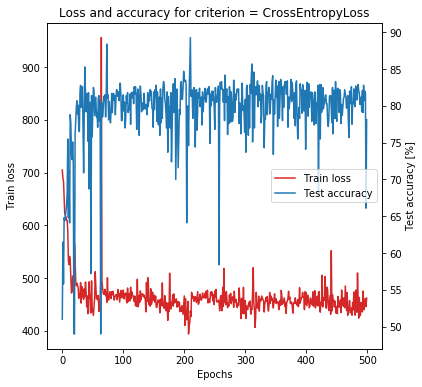

Eta = 0.044500000000000005,Batchsize = 50,wd = 0.0003, Final Test acc :  78.1
0 train_loss 713.74 test_error 49.00%
50 train_loss 693.11 test_error 51.00%
100 train_loss 613.66 test_error 32.50%
150 train_loss 482.05 test_error 19.50%
200 train_loss 464.02 test_error 18.20%
250 train_loss 614.40 test_error 20.80%
300 train_loss 460.40 test_error 18.90%
350 train_loss 454.07 test_error 21.80%
400 train_loss 459.19 test_error 19.50%
450 train_loss 418.59 test_error 27.80%
499 train_loss 692.99 test_error 49.00%


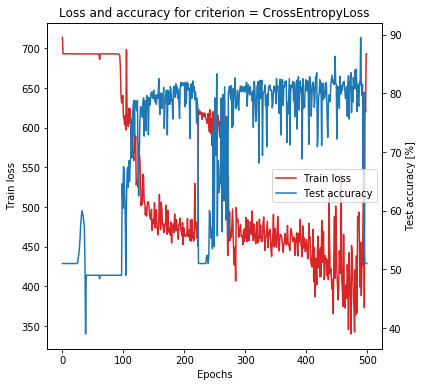

Eta = 0.044500000000000005,Batchsize = 100,wd = False, Final Test acc :  51.0
0 train_loss 759.63 test_error 55.10%
50 train_loss 693.13 test_error 49.00%
100 train_loss 693.15 test_error 41.20%
150 train_loss 693.15 test_error 49.00%
200 train_loss 692.98 test_error 49.00%
250 train_loss 693.14 test_error 46.70%
300 train_loss 611.44 test_error 17.80%
350 train_loss 483.15 test_error 18.50%
400 train_loss 693.14 test_error 49.00%
450 train_loss 693.15 test_error 42.70%
499 train_loss 693.15 test_error 47.20%


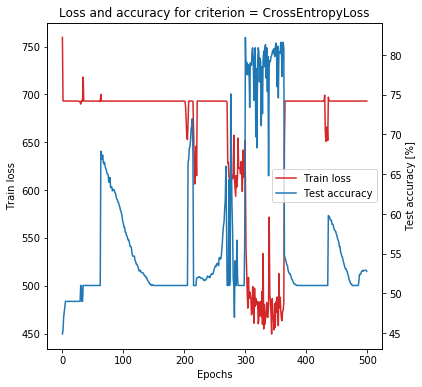

Eta = 0.044500000000000005,Batchsize = 100,wd = 3e-05, Final Test acc :  52.8
0 train_loss 733.14 test_error 49.00%
50 train_loss 507.96 test_error 20.00%
100 train_loss 483.46 test_error 21.00%
150 train_loss 481.60 test_error 24.20%
200 train_loss 495.79 test_error 21.90%
250 train_loss 474.89 test_error 19.80%
300 train_loss 469.03 test_error 19.20%
350 train_loss 469.05 test_error 19.10%
400 train_loss 512.42 test_error 19.90%
450 train_loss 469.80 test_error 23.30%
499 train_loss 454.94 test_error 18.30%


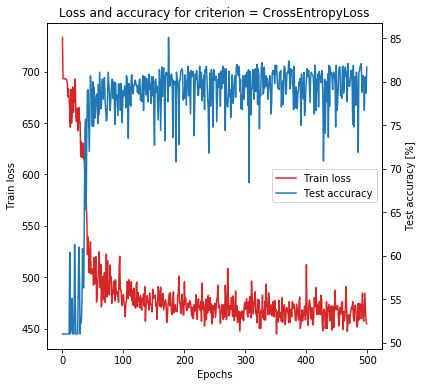

Eta = 0.044500000000000005,Batchsize = 100,wd = 0.0003, Final Test acc :  81.7
0 train_loss 710.35 test_error 49.00%
50 train_loss 599.07 test_error 43.10%
100 train_loss 451.70 test_error 19.10%
150 train_loss 450.67 test_error 18.20%
200 train_loss 386.83 test_error 24.00%
250 train_loss 447.31 test_error 17.80%
300 train_loss 438.28 test_error 17.90%
350 train_loss 439.20 test_error 18.90%
400 train_loss 359.94 test_error 13.40%
450 train_loss 434.80 test_error 18.60%
499 train_loss 437.32 test_error 12.50%


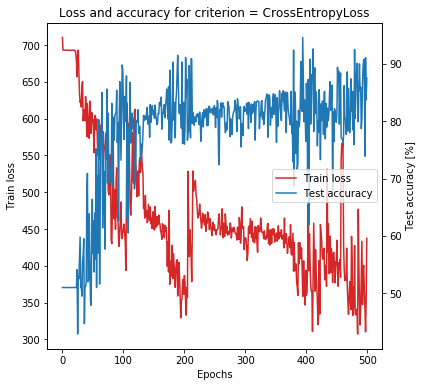

Eta = 0.055600000000000004,Batchsize = 50,wd = False, Final Test acc :  87.5
0 train_loss 696.28 test_error 46.50%
50 train_loss 459.50 test_error 19.90%
100 train_loss 463.38 test_error 22.70%
150 train_loss 414.03 test_error 14.50%
200 train_loss 439.62 test_error 25.80%
250 train_loss 481.51 test_error 27.50%
300 train_loss 372.62 test_error 12.50%
350 train_loss 382.83 test_error 16.90%
400 train_loss 393.84 test_error 21.20%
450 train_loss 386.82 test_error 15.30%
499 train_loss 410.19 test_error 14.50%


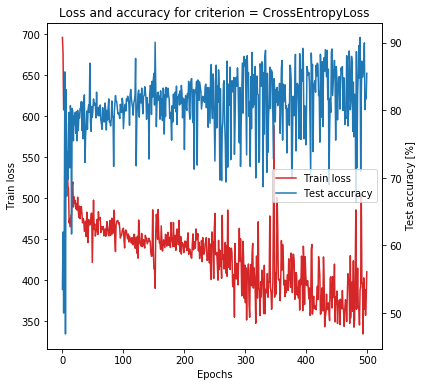

Eta = 0.055600000000000004,Batchsize = 50,wd = 3e-05, Final Test acc :  85.5
0 train_loss 691.12 test_error 49.00%
50 train_loss 465.90 test_error 19.30%
100 train_loss 468.83 test_error 21.30%
150 train_loss 477.59 test_error 22.00%
200 train_loss 471.88 test_error 18.30%
250 train_loss 454.10 test_error 23.90%
300 train_loss 472.59 test_error 21.40%
350 train_loss 462.95 test_error 21.90%
400 train_loss 479.55 test_error 18.60%
450 train_loss 456.50 test_error 18.30%
499 train_loss 476.49 test_error 17.80%


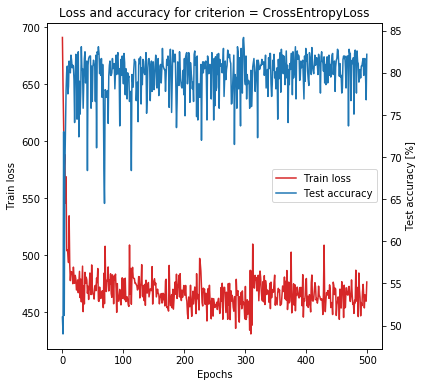

Eta = 0.055600000000000004,Batchsize = 50,wd = 0.0003, Final Test acc :  82.2
0 train_loss 718.97 test_error 49.00%
50 train_loss 693.16 test_error 56.40%
100 train_loss 627.56 test_error 23.00%
150 train_loss 490.66 test_error 27.20%
200 train_loss 454.63 test_error 19.60%
250 train_loss 462.58 test_error 21.20%
300 train_loss 507.91 test_error 19.40%
350 train_loss 464.18 test_error 19.10%
400 train_loss 459.93 test_error 20.60%
450 train_loss 466.11 test_error 20.30%
499 train_loss 443.59 test_error 18.40%


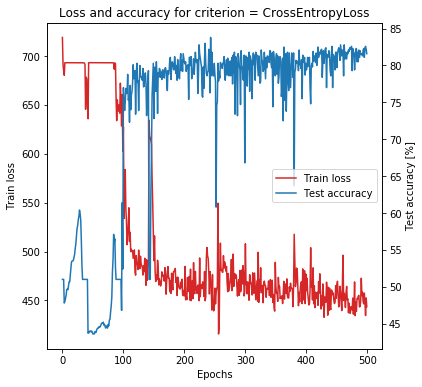

Eta = 0.055600000000000004,Batchsize = 100,wd = False, Final Test acc :  81.6
0 train_loss 736.34 test_error 43.30%
50 train_loss 581.15 test_error 51.00%
100 train_loss 556.04 test_error 51.00%
150 train_loss 545.58 test_error 28.90%
200 train_loss 538.80 test_error 20.80%
250 train_loss 474.67 test_error 20.50%
300 train_loss 693.15 test_error 49.00%
350 train_loss 693.14 test_error 49.00%
400 train_loss 693.15 test_error 49.00%
450 train_loss 693.15 test_error 49.00%
499 train_loss 693.14 test_error 49.00%


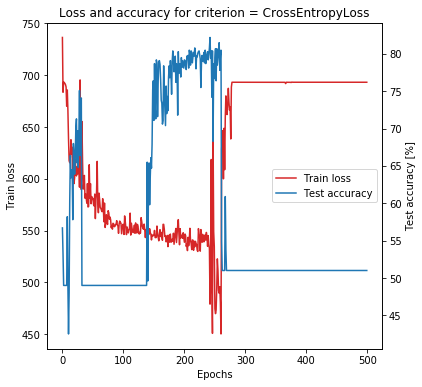

Eta = 0.055600000000000004,Batchsize = 100,wd = 3e-05, Final Test acc :  51.0
0 train_loss 731.04 test_error 51.00%
50 train_loss 509.56 test_error 23.00%
100 train_loss 491.29 test_error 24.00%
150 train_loss 502.66 test_error 22.40%
200 train_loss 478.97 test_error 19.10%
250 train_loss 487.81 test_error 23.50%
300 train_loss 480.53 test_error 18.30%
350 train_loss 498.61 test_error 23.70%
400 train_loss 469.68 test_error 23.70%
450 train_loss 471.91 test_error 19.90%
499 train_loss 480.51 test_error 20.00%


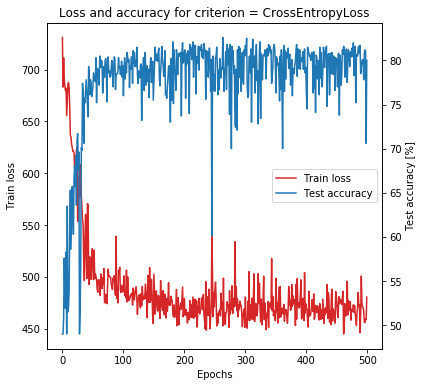

Eta = 0.055600000000000004,Batchsize = 100,wd = 0.0003, Final Test acc :  80.0
0 train_loss 692.72 test_error 51.00%
50 train_loss 693.14 test_error 51.00%
100 train_loss 614.21 test_error 39.40%
150 train_loss 553.00 test_error 22.20%
200 train_loss 527.07 test_error 19.20%
250 train_loss 469.61 test_error 17.10%
300 train_loss 451.84 test_error 19.60%
350 train_loss 430.46 test_error 19.20%
400 train_loss 426.94 test_error 18.10%
450 train_loss 1046.12 test_error 51.00%
499 train_loss 693.15 test_error 49.00%


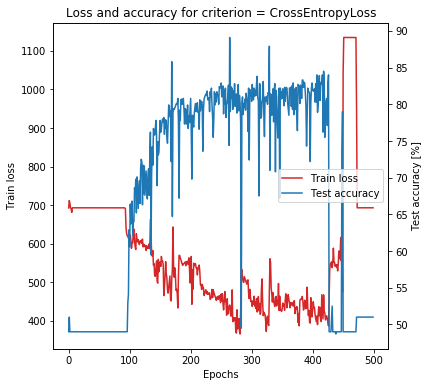

Eta = 0.06670000000000001,Batchsize = 50,wd = False, Final Test acc :  51.0
0 train_loss 759.24 test_error 36.20%
50 train_loss 433.86 test_error 19.90%
100 train_loss 448.91 test_error 24.70%
150 train_loss 452.54 test_error 19.20%
200 train_loss 468.42 test_error 18.00%
250 train_loss 464.48 test_error 17.80%
300 train_loss 411.47 test_error 15.80%
350 train_loss 413.63 test_error 17.50%
400 train_loss 341.01 test_error 7.70%
450 train_loss 421.81 test_error 24.80%
499 train_loss 307.38 test_error 11.20%


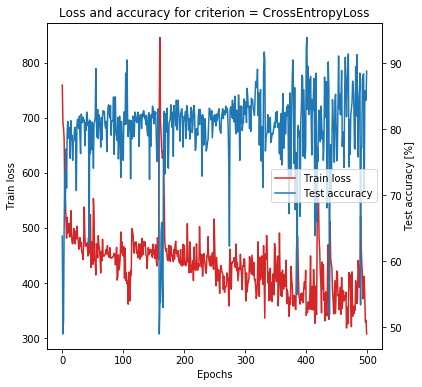

Eta = 0.06670000000000001,Batchsize = 50,wd = 3e-05, Final Test acc :  88.8
0 train_loss 694.32 test_error 35.00%
50 train_loss 468.64 test_error 24.20%
100 train_loss 467.48 test_error 20.00%
150 train_loss 443.23 test_error 48.40%
200 train_loss 462.91 test_error 18.40%
250 train_loss 463.62 test_error 18.60%
300 train_loss 458.94 test_error 19.00%
350 train_loss 463.39 test_error 15.00%
400 train_loss 441.29 test_error 17.30%
450 train_loss 442.66 test_error 24.40%
499 train_loss 445.91 test_error 16.20%


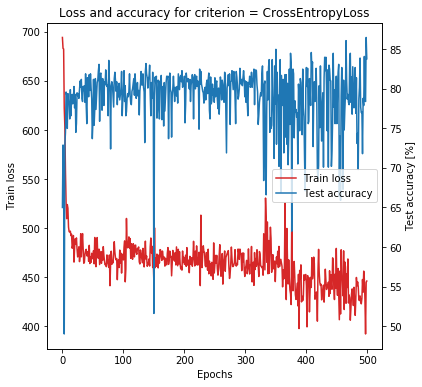

Eta = 0.06670000000000001,Batchsize = 50,wd = 0.0003, Final Test acc :  83.8
0 train_loss 785.48 test_error 51.00%
50 train_loss 693.15 test_error 50.90%
100 train_loss 693.15 test_error 50.90%
150 train_loss 693.15 test_error 50.90%
200 train_loss 693.15 test_error 50.90%
250 train_loss 693.15 test_error 50.90%
300 train_loss 693.15 test_error 50.90%
350 train_loss 693.15 test_error 50.90%
400 train_loss 693.15 test_error 50.90%
450 train_loss 693.15 test_error 50.90%
499 train_loss 693.15 test_error 50.90%


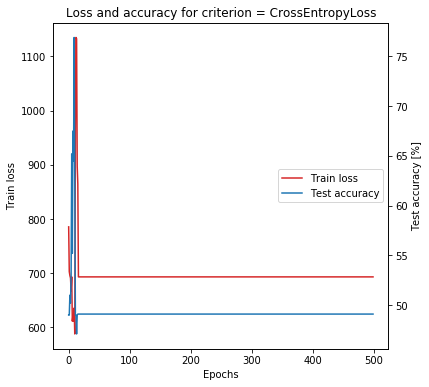

Eta = 0.06670000000000001,Batchsize = 100,wd = False, Final Test acc :  49.1
0 train_loss 1075.47 test_error 51.00%
50 train_loss 1134.92 test_error 51.00%
100 train_loss 693.15 test_error 54.70%
150 train_loss 693.15 test_error 46.60%
200 train_loss 693.15 test_error 49.00%
250 train_loss 693.15 test_error 49.00%
300 train_loss 693.15 test_error 49.00%
350 train_loss 693.15 test_error 49.00%
400 train_loss 693.15 test_error 49.00%
450 train_loss 693.15 test_error 49.00%
499 train_loss 693.15 test_error 49.00%


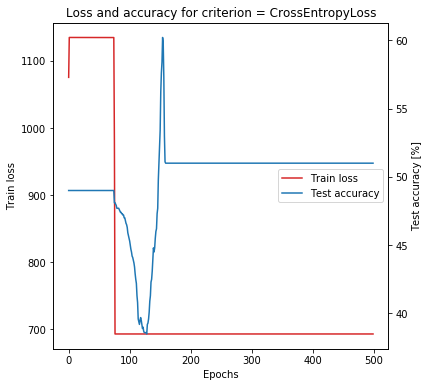

Eta = 0.06670000000000001,Batchsize = 100,wd = 3e-05, Final Test acc :  51.0
0 train_loss 768.77 test_error 49.00%
50 train_loss 693.17 test_error 54.50%
100 train_loss 556.38 test_error 29.90%
150 train_loss 490.56 test_error 20.80%
200 train_loss 477.47 test_error 20.80%
250 train_loss 463.28 test_error 19.90%
300 train_loss 462.08 test_error 23.80%
350 train_loss 448.42 test_error 19.50%
400 train_loss 485.63 test_error 21.20%
450 train_loss 475.10 test_error 21.40%
499 train_loss 481.36 test_error 20.10%


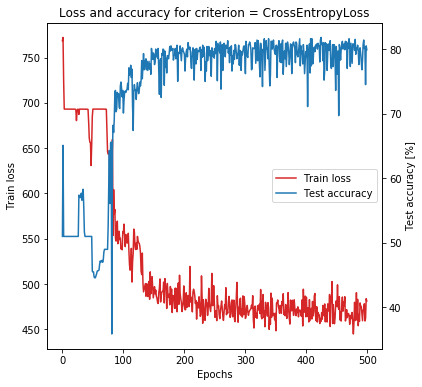

Eta = 0.06670000000000001,Batchsize = 100,wd = 0.0003, Final Test acc :  79.9
0 train_loss 730.36 test_error 41.90%
50 train_loss 471.77 test_error 22.90%
100 train_loss 469.74 test_error 18.40%
150 train_loss 458.00 test_error 19.80%
200 train_loss 493.45 test_error 25.30%
250 train_loss 457.60 test_error 28.60%
300 train_loss 490.59 test_error 29.20%
350 train_loss 444.79 test_error 20.30%
400 train_loss 360.93 test_error 19.80%
450 train_loss 342.59 test_error 22.80%
499 train_loss 389.02 test_error 19.30%


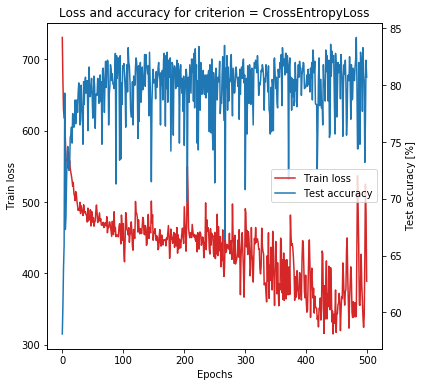

Eta = 0.07780000000000001,Batchsize = 50,wd = False, Final Test acc :  80.7
0 train_loss 722.37 test_error 49.00%
50 train_loss 693.17 test_error 57.50%
100 train_loss 693.13 test_error 45.00%
150 train_loss 461.06 test_error 19.30%
200 train_loss 445.44 test_error 20.40%
250 train_loss 452.95 test_error 20.60%
300 train_loss 494.90 test_error 21.20%
350 train_loss 439.70 test_error 18.80%
400 train_loss 435.30 test_error 24.10%
450 train_loss 440.43 test_error 19.20%
499 train_loss 454.33 test_error 20.40%


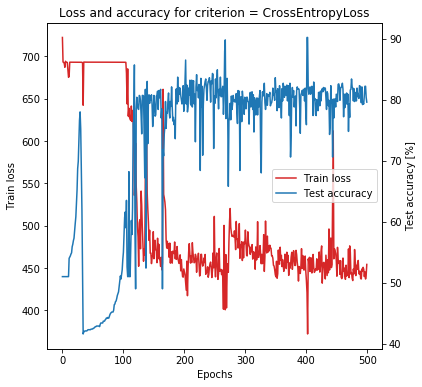

Eta = 0.07780000000000001,Batchsize = 50,wd = 3e-05, Final Test acc :  79.6
0 train_loss 700.80 test_error 51.00%
50 train_loss 476.48 test_error 18.80%
100 train_loss 464.66 test_error 20.40%
150 train_loss 462.47 test_error 19.50%
200 train_loss 466.61 test_error 18.30%
250 train_loss 474.73 test_error 22.00%
300 train_loss 491.46 test_error 20.50%
350 train_loss 490.66 test_error 19.20%
400 train_loss 478.59 test_error 18.60%
450 train_loss 470.19 test_error 19.20%
499 train_loss 485.53 test_error 19.40%


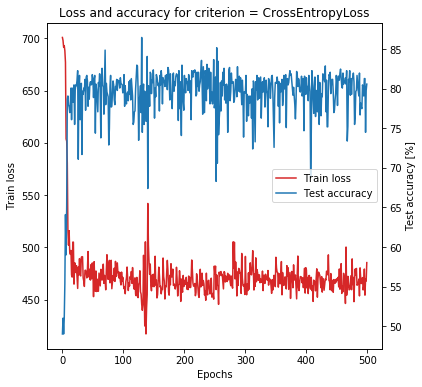

Eta = 0.07780000000000001,Batchsize = 50,wd = 0.0003, Final Test acc :  80.6
0 train_loss 764.46 test_error 49.00%
50 train_loss 693.15 test_error 51.00%
100 train_loss 693.15 test_error 51.00%
150 train_loss 693.15 test_error 51.00%
200 train_loss 693.15 test_error 51.00%
250 train_loss 693.15 test_error 51.00%
300 train_loss 693.15 test_error 51.00%
350 train_loss 693.15 test_error 51.00%
400 train_loss 693.15 test_error 51.00%
450 train_loss 693.15 test_error 51.00%
499 train_loss 693.15 test_error 51.00%


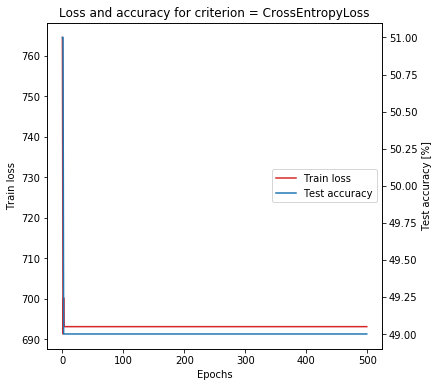

Eta = 0.07780000000000001,Batchsize = 100,wd = False, Final Test acc :  49.0
0 train_loss 741.89 test_error 51.00%
50 train_loss 693.15 test_error 51.00%
100 train_loss 693.15 test_error 51.00%
150 train_loss 693.15 test_error 51.00%
200 train_loss 693.15 test_error 51.00%
250 train_loss 693.15 test_error 51.00%
300 train_loss 693.15 test_error 51.00%
350 train_loss 693.15 test_error 51.00%
400 train_loss 693.15 test_error 51.00%
450 train_loss 693.15 test_error 51.00%
499 train_loss 693.15 test_error 51.00%


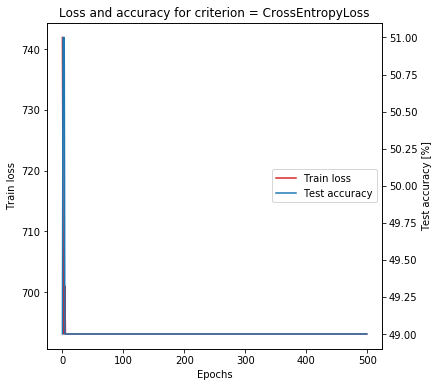

Eta = 0.07780000000000001,Batchsize = 100,wd = 3e-05, Final Test acc :  49.0
0 train_loss 730.44 test_error 51.00%
50 train_loss 693.13 test_error 51.00%
100 train_loss 619.49 test_error 32.40%
150 train_loss 588.43 test_error 51.00%
200 train_loss 688.66 test_error 48.80%
250 train_loss 688.14 test_error 48.70%
300 train_loss 687.62 test_error 48.40%
350 train_loss 649.00 test_error 49.00%
400 train_loss 636.32 test_error 49.00%
450 train_loss 624.81 test_error 23.90%
499 train_loss 618.13 test_error 34.90%


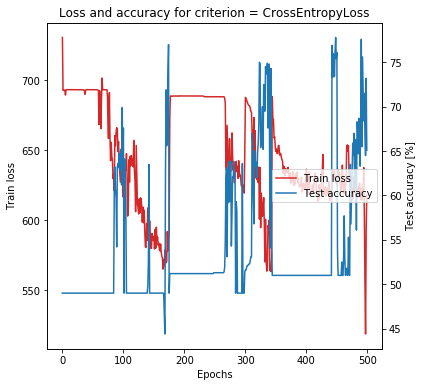

Eta = 0.07780000000000001,Batchsize = 100,wd = 0.0003, Final Test acc :  65.1
0 train_loss 697.67 test_error 49.00%
50 train_loss 483.98 test_error 20.90%
100 train_loss 460.04 test_error 21.50%
150 train_loss 457.13 test_error 19.20%
200 train_loss 443.12 test_error 22.00%
250 train_loss 442.45 test_error 22.80%
300 train_loss 393.40 test_error 21.30%
350 train_loss 475.69 test_error 22.30%
400 train_loss 445.96 test_error 20.40%
450 train_loss 429.52 test_error 16.60%
499 train_loss 517.47 test_error 21.40%


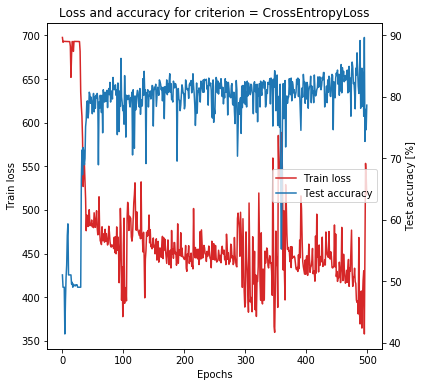

Eta = 0.0889,Batchsize = 50,wd = False, Final Test acc :  78.6
0 train_loss 723.19 test_error 24.00%
50 train_loss 465.94 test_error 18.70%
100 train_loss 457.81 test_error 18.80%
150 train_loss 439.47 test_error 20.10%
200 train_loss 446.09 test_error 16.40%
250 train_loss 439.13 test_error 26.20%
300 train_loss 616.15 test_error 49.00%
350 train_loss 557.36 test_error 37.20%
400 train_loss 573.15 test_error 30.80%
450 train_loss 498.38 test_error 20.40%
499 train_loss 463.90 test_error 26.80%


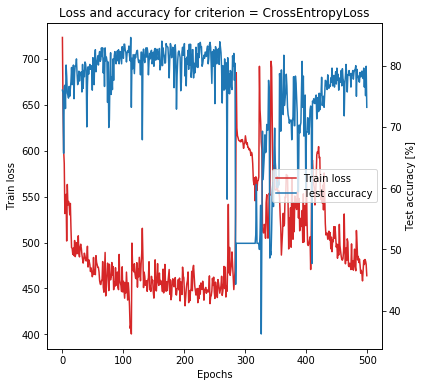

Eta = 0.0889,Batchsize = 50,wd = 3e-05, Final Test acc :  73.2
0 train_loss 707.26 test_error 55.70%
50 train_loss 489.48 test_error 22.80%
100 train_loss 468.95 test_error 21.90%
150 train_loss 477.25 test_error 20.70%
200 train_loss 474.02 test_error 18.40%
250 train_loss 461.12 test_error 23.80%
300 train_loss 483.26 test_error 20.20%
350 train_loss 461.63 test_error 21.20%
400 train_loss 462.17 test_error 18.60%
450 train_loss 458.34 test_error 17.70%
499 train_loss 460.07 test_error 18.90%


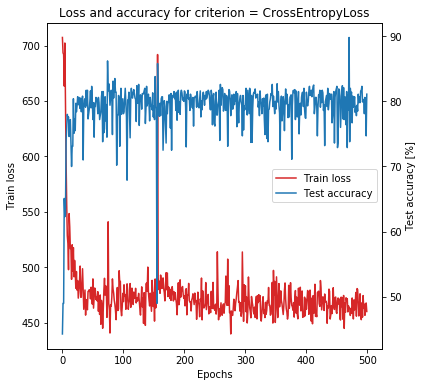

Eta = 0.0889,Batchsize = 50,wd = 0.0003, Final Test acc :  81.1
0 train_loss 853.02 test_error 51.00%
50 train_loss 693.15 test_error 60.70%
100 train_loss 693.15 test_error 60.70%
150 train_loss 693.15 test_error 60.70%
200 train_loss 693.15 test_error 60.70%
250 train_loss 693.15 test_error 60.60%
300 train_loss 693.15 test_error 60.60%
350 train_loss 693.15 test_error 60.60%
400 train_loss 693.15 test_error 60.60%
450 train_loss 693.15 test_error 60.60%
499 train_loss 693.15 test_error 60.60%


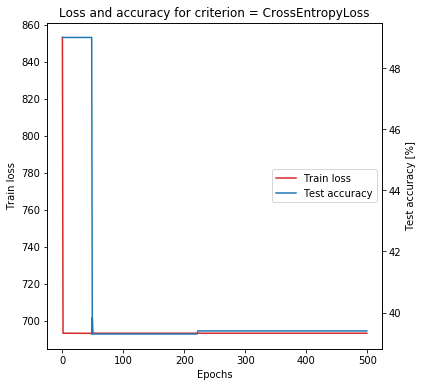

Eta = 0.0889,Batchsize = 100,wd = False, Final Test acc :  39.4
0 train_loss 1045.84 test_error 51.00%
50 train_loss 693.15 test_error 49.00%
100 train_loss 693.15 test_error 49.00%
150 train_loss 693.15 test_error 49.00%
200 train_loss 693.15 test_error 49.00%
250 train_loss 693.15 test_error 49.00%
300 train_loss 693.15 test_error 49.00%
350 train_loss 693.15 test_error 49.00%
400 train_loss 693.15 test_error 49.00%
450 train_loss 693.15 test_error 49.00%
499 train_loss 693.15 test_error 49.00%


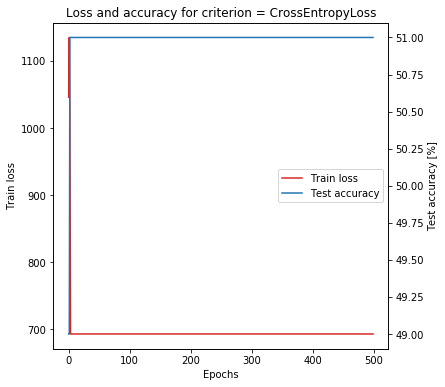

Eta = 0.0889,Batchsize = 100,wd = 3e-05, Final Test acc :  51.0
0 train_loss 713.85 test_error 51.00%
50 train_loss 693.15 test_error 51.00%
100 train_loss 693.14 test_error 51.00%
150 train_loss 689.17 test_error 48.20%
200 train_loss 652.44 test_error 51.00%
250 train_loss 606.62 test_error 51.00%
300 train_loss 636.52 test_error 55.80%
350 train_loss 564.77 test_error 27.00%
400 train_loss 535.91 test_error 23.60%
450 train_loss 495.83 test_error 21.60%
499 train_loss 506.98 test_error 19.30%


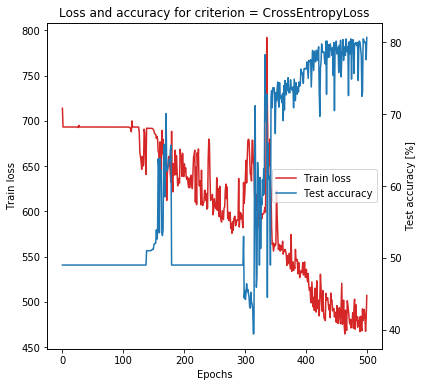

Eta = 0.0889,Batchsize = 100,wd = 0.0003, Final Test acc :  80.7
0 train_loss 716.38 test_error 41.90%
50 train_loss 693.20 test_error 49.00%
100 train_loss 693.18 test_error 49.00%
150 train_loss 693.13 test_error 49.00%
200 train_loss 693.14 test_error 49.00%
250 train_loss 693.14 test_error 49.00%
300 train_loss 693.14 test_error 49.00%
350 train_loss 693.13 test_error 49.00%
400 train_loss 693.14 test_error 49.00%
450 train_loss 693.13 test_error 49.00%
499 train_loss 693.13 test_error 49.00%


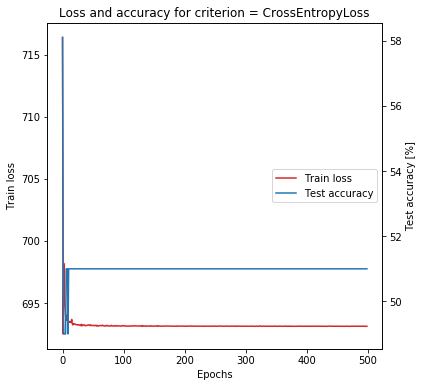

Eta = 0.1,Batchsize = 50,wd = False, Final Test acc :  51.0
0 train_loss 728.26 test_error 51.00%
50 train_loss 479.86 test_error 19.70%
100 train_loss 478.02 test_error 20.80%
150 train_loss 463.30 test_error 19.40%
200 train_loss 446.50 test_error 18.50%
250 train_loss 440.67 test_error 17.90%
300 train_loss 465.97 test_error 16.90%
350 train_loss 460.04 test_error 19.00%
400 train_loss 458.17 test_error 22.20%
450 train_loss 452.12 test_error 22.50%
499 train_loss 439.32 test_error 20.60%


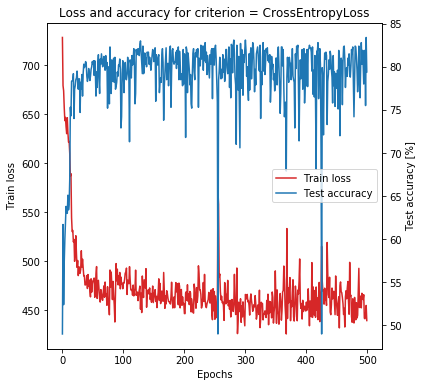

Eta = 0.1,Batchsize = 50,wd = 3e-05, Final Test acc :  79.4
0 train_loss 709.36 test_error 49.00%
50 train_loss 475.87 test_error 18.60%
100 train_loss 475.57 test_error 20.30%
150 train_loss 465.66 test_error 24.40%
200 train_loss 473.96 test_error 20.80%
250 train_loss 472.56 test_error 20.50%
300 train_loss 469.70 test_error 20.70%
350 train_loss 467.46 test_error 19.80%
400 train_loss 458.65 test_error 21.50%
450 train_loss 478.48 test_error 19.70%
499 train_loss 465.15 test_error 22.20%


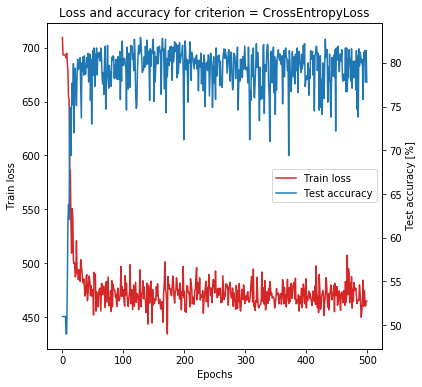

Eta = 0.1,Batchsize = 50,wd = 0.0003, Final Test acc :  77.8
0 train_loss 762.21 test_error 51.00%
50 train_loss 693.20 test_error 49.00%
100 train_loss 693.16 test_error 49.00%
150 train_loss 693.14 test_error 49.00%
200 train_loss 693.13 test_error 49.00%
250 train_loss 693.15 test_error 49.00%
300 train_loss 693.12 test_error 49.00%
350 train_loss 693.12 test_error 49.00%
400 train_loss 693.13 test_error 49.00%
450 train_loss 693.12 test_error 49.00%
499 train_loss 693.14 test_error 49.00%


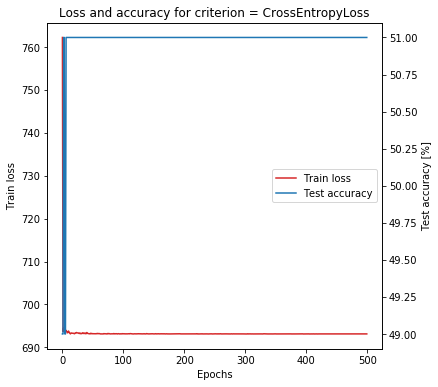

Eta = 0.1,Batchsize = 100,wd = False, Final Test acc :  51.0
0 train_loss 723.85 test_error 49.00%
50 train_loss 693.15 test_error 51.00%
100 train_loss 693.15 test_error 51.00%
150 train_loss 693.15 test_error 51.00%
200 train_loss 693.15 test_error 51.00%
250 train_loss 693.15 test_error 51.00%
300 train_loss 693.15 test_error 51.00%
350 train_loss 693.15 test_error 51.00%
400 train_loss 693.15 test_error 51.00%
450 train_loss 693.15 test_error 51.00%
499 train_loss 693.15 test_error 51.00%


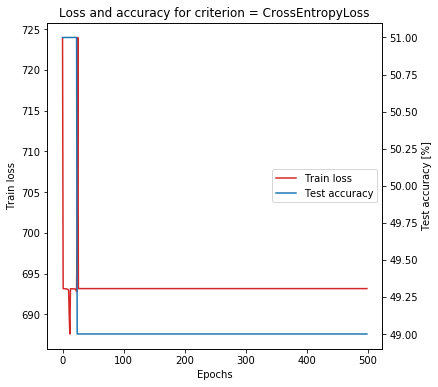

Eta = 0.1,Batchsize = 100,wd = 3e-05, Final Test acc :  49.0
0 train_loss 1091.86 test_error 51.00%
50 train_loss 693.15 test_error 51.20%
100 train_loss 688.13 test_error 48.10%
150 train_loss 641.27 test_error 51.00%
200 train_loss 627.43 test_error 51.00%
250 train_loss 692.57 test_error 57.70%
300 train_loss 693.15 test_error 49.00%
350 train_loss 614.91 test_error 51.00%
400 train_loss 666.11 test_error 51.00%
450 train_loss 666.78 test_error 52.20%
499 train_loss 660.62 test_error 51.00%


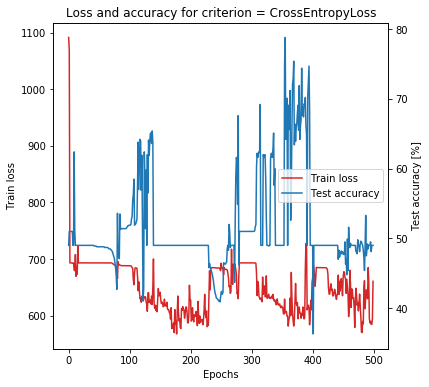

Eta = 0.1,Batchsize = 100,wd = 0.0003, Final Test acc :  49.0


In [6]:
#GRID2
accuracy_list = []
for lr in np.linspace(1e-4,1e-1,10):
    for b in [50,100]:
        for wd in [False,3e-5,3e-4]:
            #reset parameters to "unlearn"
            model.reset_param()
            losses, test_accs = train_model_SGD(model,CROSS,data,target,data_test,target_test,
                                           b,nb_epochs,eta = lr, wd=wd,
                                            plot_loss=True,plot_points=False)
            accuracy_list.append([lr,b,wd,test_accs[-1]])
            print("Eta = {},Batchsize = {},wd = {}, Final Test acc : ".format(lr,b,wd), test_accs[-1])

0 train_loss 687.00 test_error 45.70%
50 train_loss 686.54 test_error 44.90%
100 train_loss 686.09 test_error 43.70%
150 train_loss 685.67 test_error 41.40%
200 train_loss 685.27 test_error 38.40%
250 train_loss 684.89 test_error 34.70%
300 train_loss 684.53 test_error 32.60%
350 train_loss 684.17 test_error 30.50%
400 train_loss 683.83 test_error 28.60%
450 train_loss 683.48 test_error 27.60%
499 train_loss 683.15 test_error 26.90%


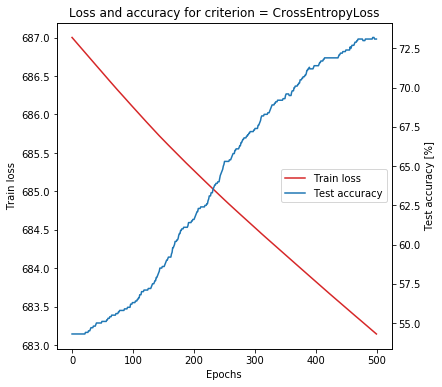

Eta = 1e-06,Batchsize = 25,wd = False, Final Test acc :  73.1
0 train_loss 903.55 test_error 49.00%
50 train_loss 872.11 test_error 49.00%
100 train_loss 844.61 test_error 49.00%
150 train_loss 821.60 test_error 49.00%
200 train_loss 802.88 test_error 49.00%
250 train_loss 787.88 test_error 49.00%
300 train_loss 775.89 test_error 49.00%
350 train_loss 766.28 test_error 49.00%
400 train_loss 758.49 test_error 49.00%
450 train_loss 752.09 test_error 49.00%
499 train_loss 746.85 test_error 49.00%


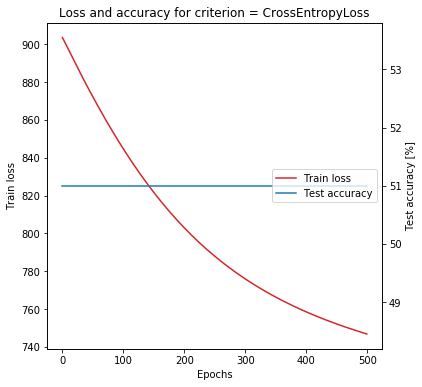

Eta = 1e-06,Batchsize = 25,wd = 1e-05, Final Test acc :  51.0
0 train_loss 708.76 test_error 49.00%
50 train_loss 706.86 test_error 49.00%
100 train_loss 705.21 test_error 49.00%
150 train_loss 703.78 test_error 49.00%
200 train_loss 702.52 test_error 49.00%
250 train_loss 701.42 test_error 49.00%
300 train_loss 700.44 test_error 49.00%
350 train_loss 699.57 test_error 49.00%
400 train_loss 698.78 test_error 49.00%
450 train_loss 698.07 test_error 49.00%
499 train_loss 697.44 test_error 49.00%


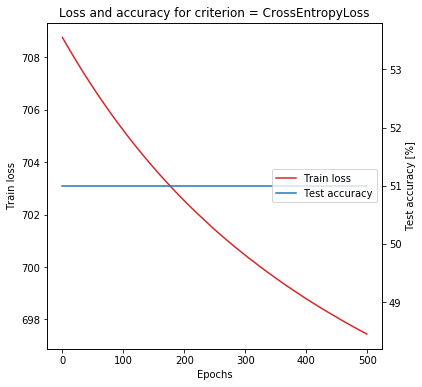

Eta = 1e-06,Batchsize = 25,wd = 1e-06, Final Test acc :  51.0
0 train_loss 712.16 test_error 59.50%
50 train_loss 707.02 test_error 60.90%
100 train_loss 702.98 test_error 58.80%
150 train_loss 699.80 test_error 57.80%
200 train_loss 697.29 test_error 57.30%
250 train_loss 695.31 test_error 55.90%
300 train_loss 693.72 test_error 54.40%
350 train_loss 692.42 test_error 52.90%
400 train_loss 691.34 test_error 51.70%
450 train_loss 690.43 test_error 50.10%
499 train_loss 689.66 test_error 49.70%


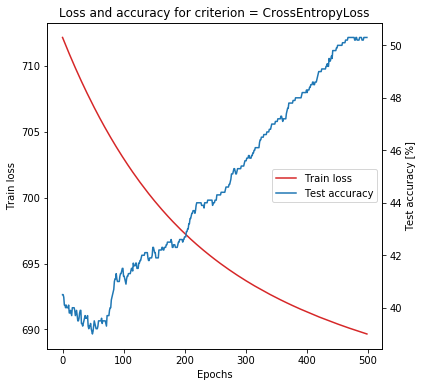

Eta = 1e-06,Batchsize = 25,wd = 1e-07, Final Test acc :  50.3
0 train_loss 693.47 test_error 40.50%
50 train_loss 693.29 test_error 40.70%
100 train_loss 693.12 test_error 40.50%
150 train_loss 692.95 test_error 41.20%
200 train_loss 692.80 test_error 41.60%
250 train_loss 692.66 test_error 41.90%
300 train_loss 692.52 test_error 42.50%
350 train_loss 692.39 test_error 42.70%
400 train_loss 692.27 test_error 42.90%
450 train_loss 692.15 test_error 42.80%
499 train_loss 692.04 test_error 42.40%


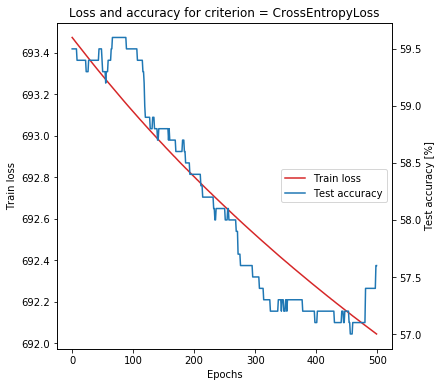

Eta = 1e-06,Batchsize = 50,wd = False, Final Test acc :  57.6
0 train_loss 749.34 test_error 49.00%
50 train_loss 741.06 test_error 49.00%
100 train_loss 734.27 test_error 49.00%
150 train_loss 728.70 test_error 49.00%
200 train_loss 724.10 test_error 49.00%
250 train_loss 720.30 test_error 49.00%
300 train_loss 717.13 test_error 49.00%
350 train_loss 714.46 test_error 49.00%
400 train_loss 712.21 test_error 49.00%
450 train_loss 710.29 test_error 49.00%
499 train_loss 708.66 test_error 49.00%


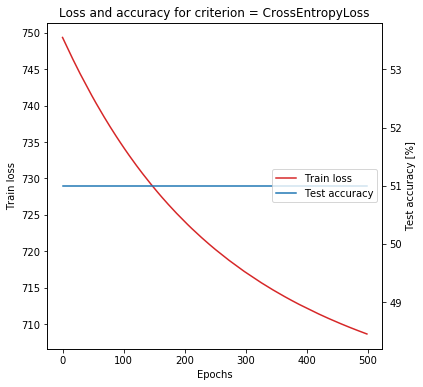

Eta = 1e-06,Batchsize = 50,wd = 1e-05, Final Test acc :  51.0
0 train_loss 766.61 test_error 51.00%
50 train_loss 757.04 test_error 51.00%
100 train_loss 748.66 test_error 51.00%
150 train_loss 741.36 test_error 51.00%
200 train_loss 735.02 test_error 51.00%
250 train_loss 729.52 test_error 51.00%
300 train_loss 724.76 test_error 51.00%
350 train_loss 720.64 test_error 51.00%
400 train_loss 717.08 test_error 51.00%
450 train_loss 714.00 test_error 51.00%
499 train_loss 711.39 test_error 51.00%


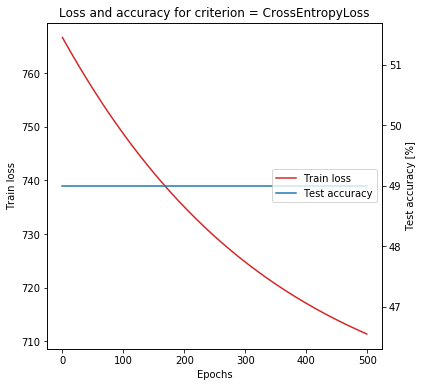

Eta = 1e-06,Batchsize = 50,wd = 1e-06, Final Test acc :  49.0
0 train_loss 877.48 test_error 51.00%
50 train_loss 855.88 test_error 51.00%
100 train_loss 833.94 test_error 51.00%
150 train_loss 812.38 test_error 51.00%
200 train_loss 792.00 test_error 51.00%
250 train_loss 773.43 test_error 51.00%
300 train_loss 757.02 test_error 51.00%
350 train_loss 742.82 test_error 51.00%
400 train_loss 730.13 test_error 51.00%
450 train_loss 720.38 test_error 51.00%
499 train_loss 712.75 test_error 51.00%


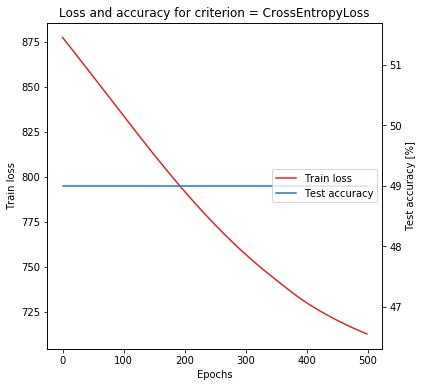

Eta = 1e-06,Batchsize = 50,wd = 1e-07, Final Test acc :  49.0
0 train_loss 775.45 test_error 51.00%
50 train_loss 688.73 test_error 44.80%
100 train_loss 684.88 test_error 41.20%
150 train_loss 678.82 test_error 39.60%
200 train_loss 668.02 test_error 35.60%
250 train_loss 650.35 test_error 25.10%
300 train_loss 628.47 test_error 21.50%
350 train_loss 602.09 test_error 21.50%
400 train_loss 568.19 test_error 17.50%
450 train_loss 525.28 test_error 14.30%
499 train_loss 478.05 test_error 14.80%


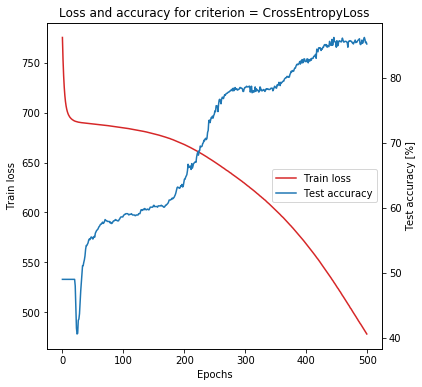

Eta = 5.357894736842106e-05,Batchsize = 25,wd = False, Final Test acc :  85.2
0 train_loss 750.88 test_error 51.00%
50 train_loss 685.53 test_error 36.20%
100 train_loss 682.09 test_error 31.20%
150 train_loss 678.82 test_error 27.80%
200 train_loss 675.47 test_error 25.80%
250 train_loss 672.12 test_error 21.90%
300 train_loss 668.65 test_error 20.50%
350 train_loss 664.83 test_error 18.70%
400 train_loss 660.52 test_error 15.30%
450 train_loss 655.83 test_error 14.10%
499 train_loss 650.68 test_error 14.30%


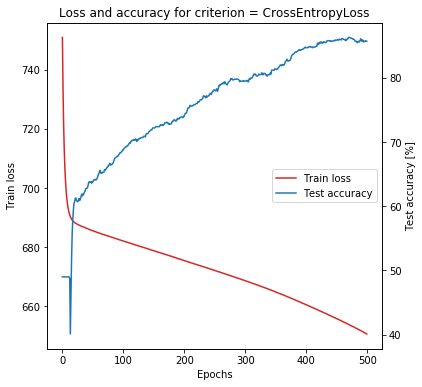

Eta = 5.357894736842106e-05,Batchsize = 25,wd = 1e-05, Final Test acc :  85.7
0 train_loss 702.45 test_error 51.00%
50 train_loss 688.50 test_error 33.10%
100 train_loss 685.91 test_error 30.30%
150 train_loss 682.86 test_error 27.80%
200 train_loss 678.72 test_error 26.60%
250 train_loss 673.10 test_error 26.80%
300 train_loss 665.40 test_error 29.20%
350 train_loss 655.69 test_error 30.20%
400 train_loss 643.76 test_error 30.10%
450 train_loss 629.35 test_error 29.00%
499 train_loss 611.45 test_error 27.80%


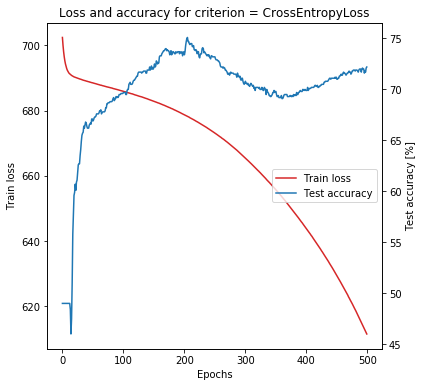

Eta = 5.357894736842106e-05,Batchsize = 25,wd = 1e-06, Final Test acc :  72.2
0 train_loss 748.69 test_error 51.00%
50 train_loss 693.79 test_error 51.00%
100 train_loss 692.28 test_error 44.80%
150 train_loss 690.79 test_error 39.90%
200 train_loss 688.50 test_error 38.90%
250 train_loss 685.15 test_error 34.20%
300 train_loss 679.86 test_error 28.10%
350 train_loss 671.09 test_error 26.40%
400 train_loss 657.21 test_error 27.10%
450 train_loss 639.43 test_error 26.30%
499 train_loss 619.36 test_error 26.50%


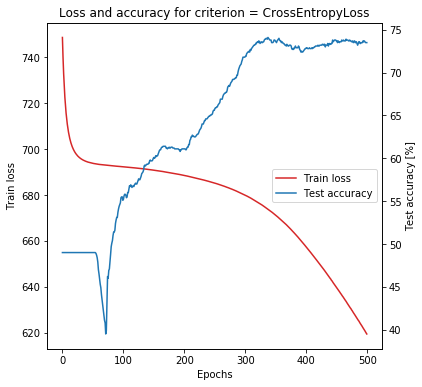

Eta = 5.357894736842106e-05,Batchsize = 25,wd = 1e-07, Final Test acc :  73.5
0 train_loss 697.25 test_error 51.00%
50 train_loss 685.32 test_error 41.10%
100 train_loss 680.92 test_error 40.60%
150 train_loss 675.56 test_error 37.90%
200 train_loss 668.63 test_error 34.00%
250 train_loss 659.62 test_error 30.60%
300 train_loss 648.06 test_error 28.90%
350 train_loss 633.24 test_error 26.20%
400 train_loss 614.51 test_error 24.60%
450 train_loss 592.59 test_error 24.70%
499 train_loss 569.14 test_error 23.10%


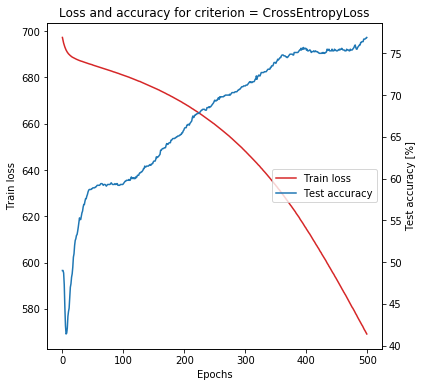

Eta = 5.357894736842106e-05,Batchsize = 50,wd = False, Final Test acc :  76.9
0 train_loss 892.71 test_error 49.00%
50 train_loss 687.37 test_error 48.40%
100 train_loss 681.30 test_error 30.70%
150 train_loss 674.90 test_error 30.70%
200 train_loss 667.21 test_error 31.00%
250 train_loss 658.24 test_error 30.40%
300 train_loss 647.91 test_error 30.00%
350 train_loss 636.41 test_error 28.70%
400 train_loss 622.62 test_error 27.20%
450 train_loss 606.49 test_error 24.70%
499 train_loss 588.40 test_error 23.10%


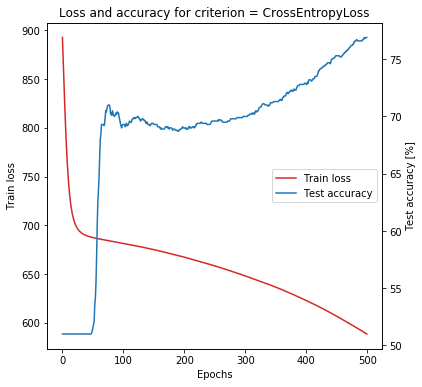

Eta = 5.357894736842106e-05,Batchsize = 50,wd = 1e-05, Final Test acc :  76.9
0 train_loss 698.16 test_error 53.70%
50 train_loss 670.23 test_error 26.90%
100 train_loss 643.12 test_error 19.90%
150 train_loss 610.97 test_error 16.30%
200 train_loss 571.14 test_error 14.50%
250 train_loss 525.03 test_error 13.20%
300 train_loss 475.76 test_error 11.80%
350 train_loss 428.67 test_error 9.40%
400 train_loss 387.33 test_error 7.00%
450 train_loss 353.23 test_error 5.90%
499 train_loss 326.44 test_error 4.60%


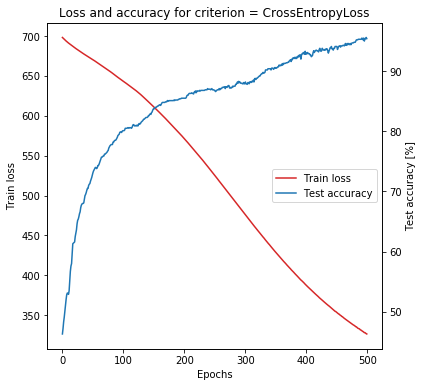

Eta = 5.357894736842106e-05,Batchsize = 50,wd = 1e-06, Final Test acc :  95.4
0 train_loss 775.10 test_error 49.00%
50 train_loss 691.39 test_error 49.00%
100 train_loss 686.40 test_error 40.80%
150 train_loss 679.72 test_error 31.00%
200 train_loss 670.70 test_error 19.50%
250 train_loss 659.85 test_error 22.60%
300 train_loss 646.53 test_error 24.10%
350 train_loss 629.75 test_error 24.40%
400 train_loss 608.73 test_error 22.90%
450 train_loss 583.26 test_error 21.40%
499 train_loss 554.79 test_error 20.90%


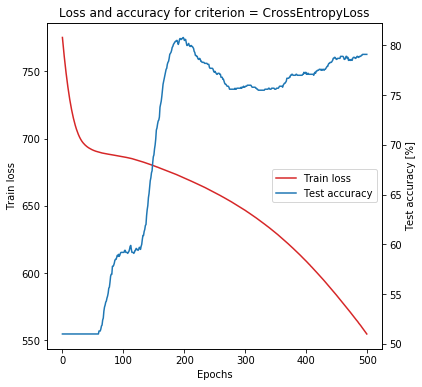

Eta = 5.357894736842106e-05,Batchsize = 50,wd = 1e-07, Final Test acc :  79.1
0 train_loss 696.38 test_error 41.10%
50 train_loss 673.62 test_error 28.50%
100 train_loss 652.55 test_error 25.00%
150 train_loss 615.75 test_error 19.50%
200 train_loss 527.26 test_error 10.70%
250 train_loss 408.15 test_error 6.00%
300 train_loss 321.05 test_error 4.70%
350 train_loss 274.83 test_error 3.00%
400 train_loss 247.71 test_error 3.20%
450 train_loss 229.15 test_error 2.80%
499 train_loss 218.70 test_error 2.60%


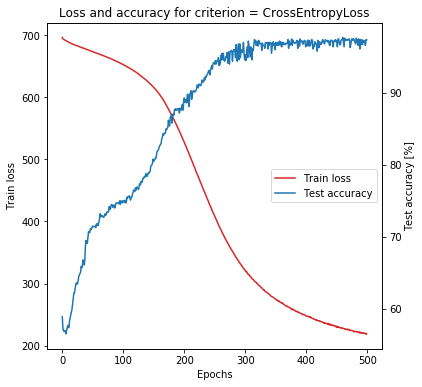

Eta = 0.00010615789473684212,Batchsize = 25,wd = False, Final Test acc :  97.4
0 train_loss 752.53 test_error 51.00%
50 train_loss 668.55 test_error 32.40%
100 train_loss 643.27 test_error 22.80%
150 train_loss 608.67 test_error 19.10%
200 train_loss 558.74 test_error 18.30%
250 train_loss 498.92 test_error 14.10%
300 train_loss 435.32 test_error 8.70%
350 train_loss 380.82 test_error 6.00%
400 train_loss 340.74 test_error 4.70%
450 train_loss 311.31 test_error 4.40%
499 train_loss 292.20 test_error 2.90%


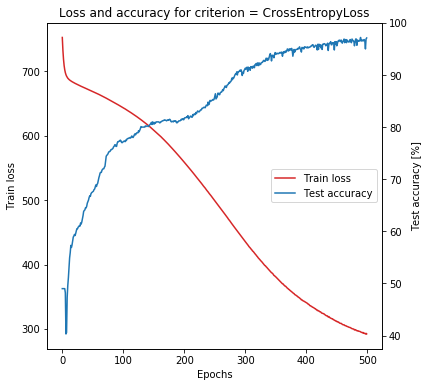

Eta = 0.00010615789473684212,Batchsize = 25,wd = 1e-05, Final Test acc :  97.1
0 train_loss 698.45 test_error 51.00%
50 train_loss 678.34 test_error 40.20%
100 train_loss 658.45 test_error 30.80%
150 train_loss 614.70 test_error 27.90%
200 train_loss 559.35 test_error 27.20%
250 train_loss 507.97 test_error 22.60%
300 train_loss 466.67 test_error 20.80%
350 train_loss 426.27 test_error 17.30%
400 train_loss 372.43 test_error 12.50%
450 train_loss 313.33 test_error 6.40%
499 train_loss 276.03 test_error 4.50%


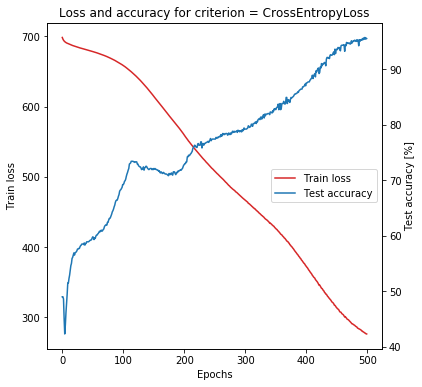

Eta = 0.00010615789473684212,Batchsize = 25,wd = 1e-06, Final Test acc :  95.5
0 train_loss 692.75 test_error 51.00%
50 train_loss 682.09 test_error 30.50%
100 train_loss 672.81 test_error 28.80%
150 train_loss 655.07 test_error 24.80%
200 train_loss 619.53 test_error 19.20%
250 train_loss 553.91 test_error 12.50%
300 train_loss 464.57 test_error 10.00%
350 train_loss 387.11 test_error 8.30%
400 train_loss 334.74 test_error 7.40%
450 train_loss 294.74 test_error 5.80%
499 train_loss 266.69 test_error 4.00%


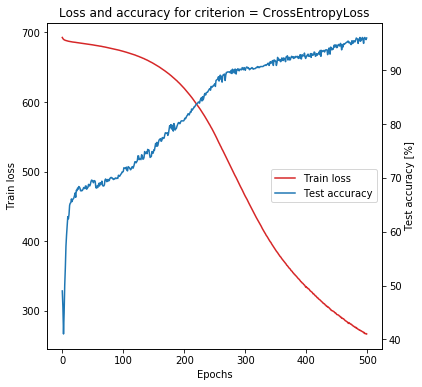

Eta = 0.00010615789473684212,Batchsize = 25,wd = 1e-07, Final Test acc :  96.0
0 train_loss 766.37 test_error 51.00%
50 train_loss 677.60 test_error 29.90%
100 train_loss 656.21 test_error 24.80%
150 train_loss 624.31 test_error 21.90%
200 train_loss 568.52 test_error 17.10%
250 train_loss 488.97 test_error 12.60%
300 train_loss 409.33 test_error 9.70%
350 train_loss 345.83 test_error 6.80%
400 train_loss 299.64 test_error 4.80%
450 train_loss 259.50 test_error 2.50%
499 train_loss 238.16 test_error 2.50%


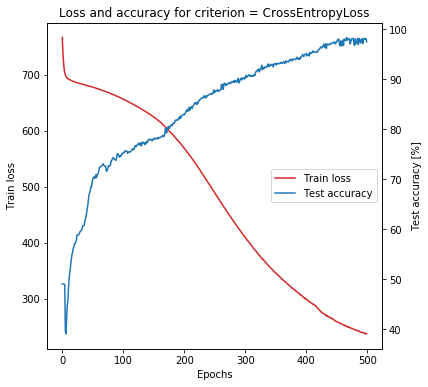

Eta = 0.00010615789473684212,Batchsize = 50,wd = False, Final Test acc :  97.5
0 train_loss 688.53 test_error 51.00%
50 train_loss 674.68 test_error 27.90%
100 train_loss 661.35 test_error 32.80%
150 train_loss 636.99 test_error 29.80%
200 train_loss 599.46 test_error 18.30%
250 train_loss 536.09 test_error 9.10%
300 train_loss 454.67 test_error 5.90%
350 train_loss 382.82 test_error 5.00%
400 train_loss 329.11 test_error 3.90%
450 train_loss 293.39 test_error 3.30%
499 train_loss 270.81 test_error 2.30%


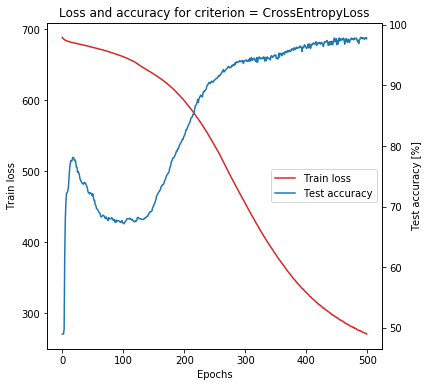

Eta = 0.00010615789473684212,Batchsize = 50,wd = 1e-05, Final Test acc :  97.7
0 train_loss 698.00 test_error 49.00%
50 train_loss 681.39 test_error 40.40%
100 train_loss 668.32 test_error 31.10%
150 train_loss 644.42 test_error 21.90%
200 train_loss 597.95 test_error 15.10%
250 train_loss 517.47 test_error 10.00%
300 train_loss 419.07 test_error 6.50%
350 train_loss 344.78 test_error 5.50%
400 train_loss 297.54 test_error 3.80%
450 train_loss 266.74 test_error 2.80%
499 train_loss 246.39 test_error 2.20%


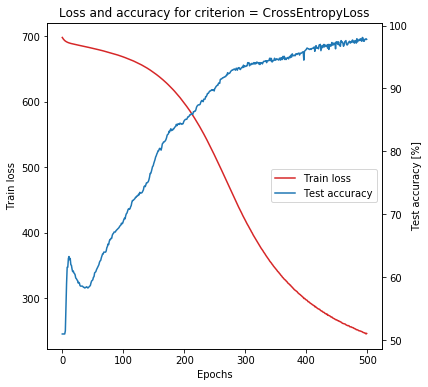

Eta = 0.00010615789473684212,Batchsize = 50,wd = 1e-06, Final Test acc :  97.8
0 train_loss 722.69 test_error 51.00%
50 train_loss 684.02 test_error 39.80%
100 train_loss 672.54 test_error 35.50%
150 train_loss 650.85 test_error 31.20%
200 train_loss 611.63 test_error 25.50%
250 train_loss 553.64 test_error 22.90%
300 train_loss 486.99 test_error 20.70%
350 train_loss 420.74 test_error 16.40%
400 train_loss 358.22 test_error 11.00%
450 train_loss 303.93 test_error 4.20%
499 train_loss 269.70 test_error 3.90%


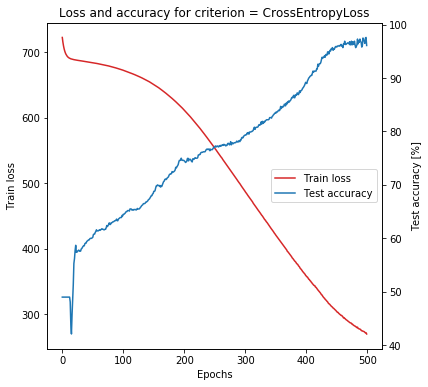

Eta = 0.00010615789473684212,Batchsize = 50,wd = 1e-07, Final Test acc :  96.1
0 train_loss 700.29 test_error 49.00%
50 train_loss 688.96 test_error 36.60%
100 train_loss 670.04 test_error 20.60%
150 train_loss 600.50 test_error 13.30%
200 train_loss 435.14 test_error 7.90%
250 train_loss 314.32 test_error 3.50%
300 train_loss 256.94 test_error 3.60%
350 train_loss 226.31 test_error 1.90%
400 train_loss 209.74 test_error 1.60%
450 train_loss 197.83 test_error 1.50%
499 train_loss 189.81 test_error 1.30%


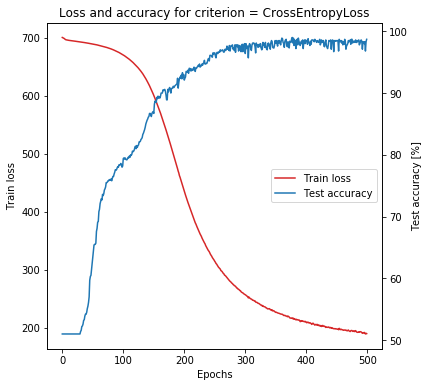

Eta = 0.00015873684210526319,Batchsize = 25,wd = False, Final Test acc :  98.7
0 train_loss 693.03 test_error 51.00%
50 train_loss 683.14 test_error 27.90%
100 train_loss 674.10 test_error 19.90%
150 train_loss 656.65 test_error 16.60%
200 train_loss 617.68 test_error 14.90%
250 train_loss 523.81 test_error 7.70%
300 train_loss 400.93 test_error 6.00%
350 train_loss 320.97 test_error 3.50%
400 train_loss 279.98 test_error 2.40%
450 train_loss 256.69 test_error 2.30%
499 train_loss 245.11 test_error 2.40%


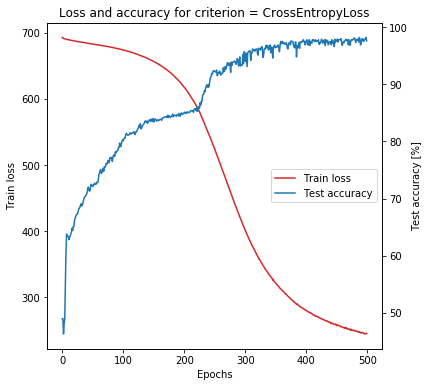

Eta = 0.00015873684210526319,Batchsize = 25,wd = 1e-05, Final Test acc :  97.6
0 train_loss 699.85 test_error 62.40%
50 train_loss 665.11 test_error 26.40%
100 train_loss 611.86 test_error 25.10%
150 train_loss 529.70 test_error 25.10%
200 train_loss 461.27 test_error 21.90%
250 train_loss 374.46 test_error 11.50%
300 train_loss 290.68 test_error 3.60%
350 train_loss 245.98 test_error 2.20%
400 train_loss 220.88 test_error 2.20%
450 train_loss 207.25 test_error 1.40%
499 train_loss 197.65 test_error 1.60%


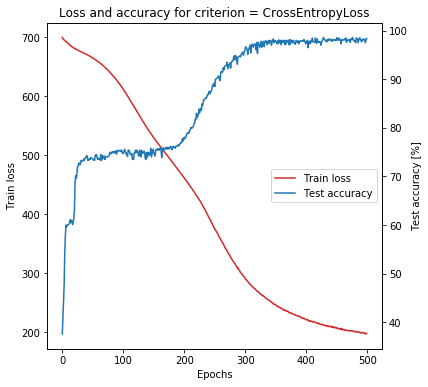

Eta = 0.00015873684210526319,Batchsize = 25,wd = 1e-06, Final Test acc :  98.4
0 train_loss 813.55 test_error 51.00%
50 train_loss 659.46 test_error 35.70%
100 train_loss 613.47 test_error 26.10%
150 train_loss 491.61 test_error 10.90%
200 train_loss 371.44 test_error 7.50%
250 train_loss 298.25 test_error 5.40%
300 train_loss 256.17 test_error 3.70%
350 train_loss 226.79 test_error 2.10%
400 train_loss 210.01 test_error 2.90%
450 train_loss 199.54 test_error 1.90%
499 train_loss 192.23 test_error 1.60%


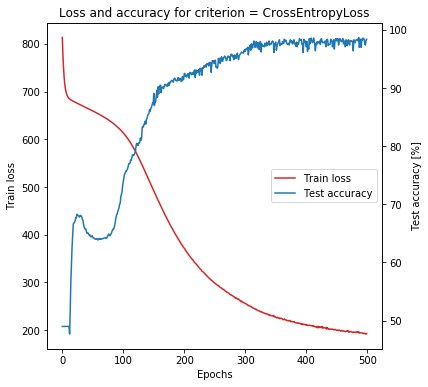

Eta = 0.00015873684210526319,Batchsize = 25,wd = 1e-07, Final Test acc :  98.4
0 train_loss 733.01 test_error 51.00%
50 train_loss 693.62 test_error 40.20%
100 train_loss 691.54 test_error 38.50%
150 train_loss 689.02 test_error 35.90%
200 train_loss 684.31 test_error 34.60%
250 train_loss 672.84 test_error 25.50%
300 train_loss 640.89 test_error 25.50%
350 train_loss 580.74 test_error 25.40%
400 train_loss 463.75 test_error 11.00%
450 train_loss 332.95 test_error 4.40%
499 train_loss 267.38 test_error 3.30%


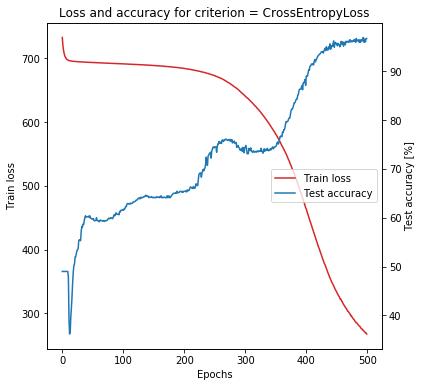

Eta = 0.00015873684210526319,Batchsize = 50,wd = False, Final Test acc :  96.7
0 train_loss 696.30 test_error 51.90%
50 train_loss 675.98 test_error 24.60%
100 train_loss 642.38 test_error 18.40%
150 train_loss 557.26 test_error 18.00%
200 train_loss 440.08 test_error 11.00%
250 train_loss 343.03 test_error 5.30%
300 train_loss 287.65 test_error 3.90%
350 train_loss 257.55 test_error 3.40%
400 train_loss 238.14 test_error 3.00%
450 train_loss 228.56 test_error 3.40%
499 train_loss 221.06 test_error 4.50%


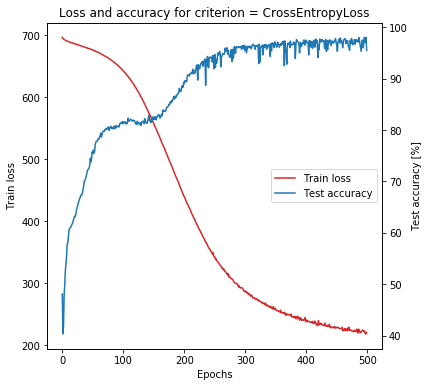

Eta = 0.00015873684210526319,Batchsize = 50,wd = 1e-05, Final Test acc :  95.5
0 train_loss 699.43 test_error 51.90%
50 train_loss 667.87 test_error 37.90%
100 train_loss 623.66 test_error 32.10%
150 train_loss 531.96 test_error 16.60%
200 train_loss 402.55 test_error 9.00%
250 train_loss 311.74 test_error 4.90%
300 train_loss 261.06 test_error 3.80%
350 train_loss 236.43 test_error 3.40%
400 train_loss 217.32 test_error 2.90%
450 train_loss 207.29 test_error 3.20%
499 train_loss 198.27 test_error 4.60%


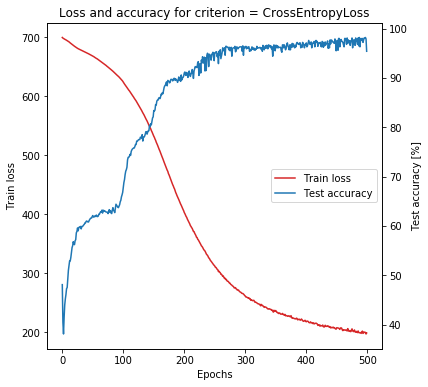

Eta = 0.00015873684210526319,Batchsize = 50,wd = 1e-06, Final Test acc :  95.4
0 train_loss 711.74 test_error 51.00%
50 train_loss 677.94 test_error 28.60%
100 train_loss 658.46 test_error 25.20%
150 train_loss 613.27 test_error 20.50%
200 train_loss 516.23 test_error 18.10%
250 train_loss 405.79 test_error 8.50%
300 train_loss 317.70 test_error 7.40%
350 train_loss 267.10 test_error 2.60%
400 train_loss 235.95 test_error 2.40%
450 train_loss 219.01 test_error 1.70%
499 train_loss 206.62 test_error 1.40%


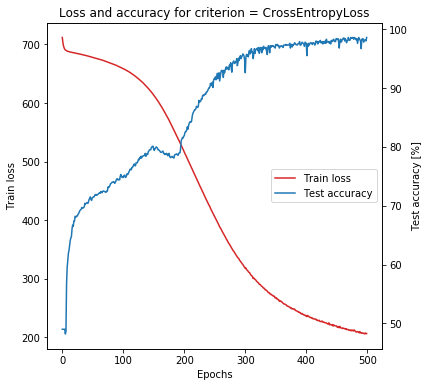

Eta = 0.00015873684210526319,Batchsize = 50,wd = 1e-07, Final Test acc :  98.6
0 train_loss 732.45 test_error 51.00%
50 train_loss 620.55 test_error 21.50%
100 train_loss 437.71 test_error 10.60%
150 train_loss 310.36 test_error 7.70%
200 train_loss 246.43 test_error 2.10%
250 train_loss 213.88 test_error 1.90%
300 train_loss 200.77 test_error 1.80%
350 train_loss 192.26 test_error 2.90%
400 train_loss 187.60 test_error 2.30%
450 train_loss 185.15 test_error 2.80%
499 train_loss 177.06 test_error 2.20%


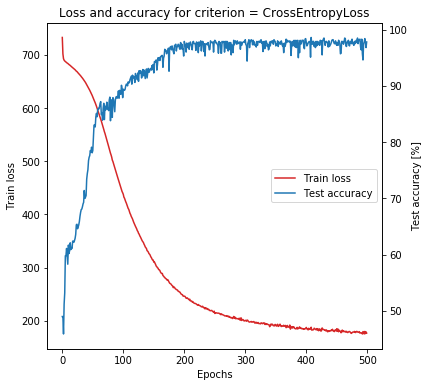

Eta = 0.00021131578947368424,Batchsize = 25,wd = False, Final Test acc :  97.8
0 train_loss 704.19 test_error 49.00%
50 train_loss 669.23 test_error 21.30%
100 train_loss 597.50 test_error 14.50%
150 train_loss 433.64 test_error 12.80%
200 train_loss 323.29 test_error 5.80%
250 train_loss 270.34 test_error 5.70%
300 train_loss 242.96 test_error 2.30%
350 train_loss 226.50 test_error 2.10%
400 train_loss 221.74 test_error 2.10%
450 train_loss 212.33 test_error 2.30%
499 train_loss 207.70 test_error 1.90%


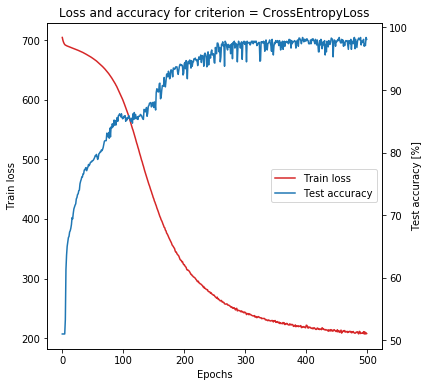

Eta = 0.00021131578947368424,Batchsize = 25,wd = 1e-05, Final Test acc :  98.1
0 train_loss 751.95 test_error 49.00%
50 train_loss 641.34 test_error 24.70%
100 train_loss 527.79 test_error 20.00%
150 train_loss 359.30 test_error 3.90%
200 train_loss 270.35 test_error 3.40%
250 train_loss 229.45 test_error 4.90%
300 train_loss 210.24 test_error 2.50%
350 train_loss 199.27 test_error 3.20%
400 train_loss 190.47 test_error 2.70%
450 train_loss 187.14 test_error 2.30%
499 train_loss 182.73 test_error 2.30%


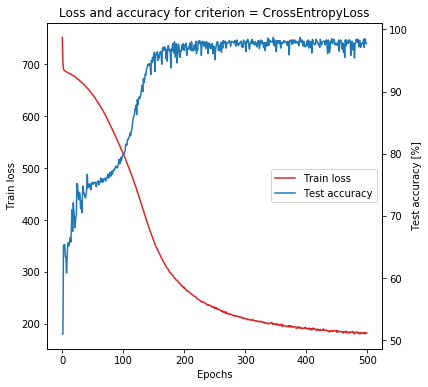

Eta = 0.00021131578947368424,Batchsize = 25,wd = 1e-06, Final Test acc :  97.7
0 train_loss 775.84 test_error 51.00%
50 train_loss 674.73 test_error 37.60%
100 train_loss 644.77 test_error 35.00%
150 train_loss 539.63 test_error 20.50%
200 train_loss 365.82 test_error 6.00%
250 train_loss 276.64 test_error 3.60%
300 train_loss 235.42 test_error 2.60%
350 train_loss 212.63 test_error 2.10%
400 train_loss 199.27 test_error 2.20%
450 train_loss 190.62 test_error 4.10%
499 train_loss 183.31 test_error 2.00%


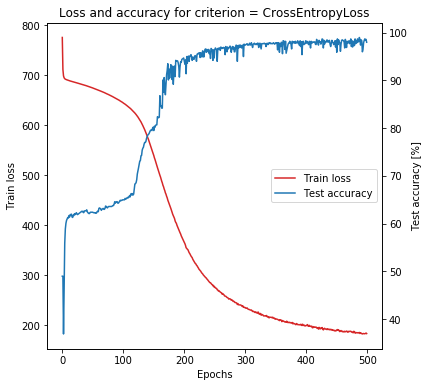

Eta = 0.00021131578947368424,Batchsize = 25,wd = 1e-07, Final Test acc :  98.0
0 train_loss 701.10 test_error 42.00%
50 train_loss 688.11 test_error 35.30%
100 train_loss 677.39 test_error 37.00%
150 train_loss 651.41 test_error 34.60%
200 train_loss 566.47 test_error 15.20%
250 train_loss 398.67 test_error 7.90%
300 train_loss 290.26 test_error 4.60%
350 train_loss 240.40 test_error 3.50%
400 train_loss 215.65 test_error 4.40%
450 train_loss 200.71 test_error 2.10%
499 train_loss 195.04 test_error 3.80%


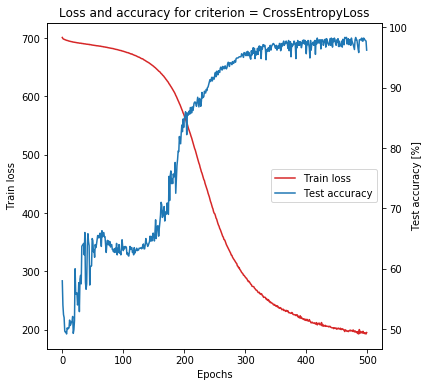

Eta = 0.00021131578947368424,Batchsize = 50,wd = False, Final Test acc :  96.2
0 train_loss 727.33 test_error 51.00%
50 train_loss 622.04 test_error 25.10%
100 train_loss 483.07 test_error 14.40%
150 train_loss 355.33 test_error 9.00%
200 train_loss 284.35 test_error 4.80%
250 train_loss 247.16 test_error 4.90%
300 train_loss 226.97 test_error 3.80%
350 train_loss 214.68 test_error 2.50%
400 train_loss 208.10 test_error 3.00%
450 train_loss 203.95 test_error 2.90%
499 train_loss 197.68 test_error 3.20%


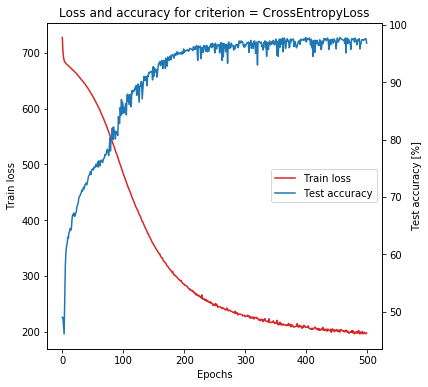

Eta = 0.00021131578947368424,Batchsize = 50,wd = 1e-05, Final Test acc :  96.8
0 train_loss 753.63 test_error 49.00%
50 train_loss 648.98 test_error 32.80%
100 train_loss 558.24 test_error 23.20%
150 train_loss 441.66 test_error 17.60%
200 train_loss 323.41 test_error 3.70%
250 train_loss 263.55 test_error 2.10%
300 train_loss 228.54 test_error 2.40%
350 train_loss 211.02 test_error 2.30%
400 train_loss 201.91 test_error 2.30%
450 train_loss 194.94 test_error 1.90%
499 train_loss 192.06 test_error 3.10%


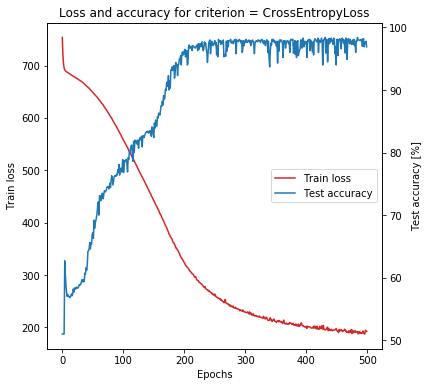

Eta = 0.00021131578947368424,Batchsize = 50,wd = 1e-06, Final Test acc :  96.9
0 train_loss 708.29 test_error 45.30%
50 train_loss 634.30 test_error 31.10%
100 train_loss 454.45 test_error 14.00%
150 train_loss 304.23 test_error 6.50%
200 train_loss 245.25 test_error 3.60%
250 train_loss 218.73 test_error 2.50%
300 train_loss 205.63 test_error 2.00%
350 train_loss 195.99 test_error 2.70%
400 train_loss 187.67 test_error 2.20%
450 train_loss 181.97 test_error 3.50%
499 train_loss 178.79 test_error 2.40%


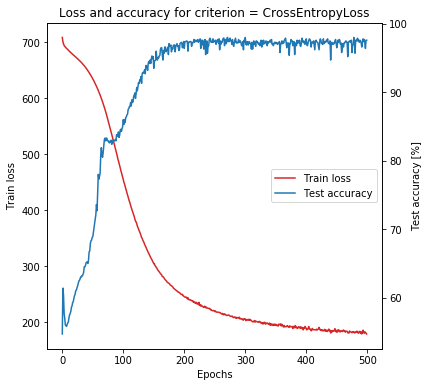

Eta = 0.00021131578947368424,Batchsize = 50,wd = 1e-07, Final Test acc :  97.6
0 train_loss 739.69 test_error 49.00%
50 train_loss 672.12 test_error 31.90%
100 train_loss 617.47 test_error 25.00%
150 train_loss 481.39 test_error 16.30%
200 train_loss 310.84 test_error 4.70%
250 train_loss 246.58 test_error 3.50%
300 train_loss 216.81 test_error 3.30%
350 train_loss 200.46 test_error 2.20%
400 train_loss 188.75 test_error 2.40%
450 train_loss 184.46 test_error 1.70%
499 train_loss 180.29 test_error 1.70%


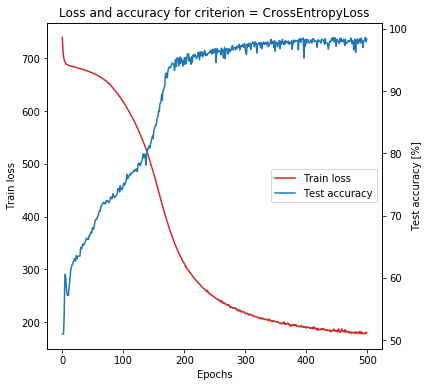

Eta = 0.0002638947368421053,Batchsize = 25,wd = False, Final Test acc :  98.3
0 train_loss 702.15 test_error 42.20%
50 train_loss 684.19 test_error 24.50%
100 train_loss 646.24 test_error 20.70%
150 train_loss 519.53 test_error 15.50%
200 train_loss 359.22 test_error 9.10%
250 train_loss 272.70 test_error 5.20%
300 train_loss 235.34 test_error 2.20%
350 train_loss 218.53 test_error 2.10%
400 train_loss 211.10 test_error 4.00%
450 train_loss 204.33 test_error 1.80%
499 train_loss 203.80 test_error 1.70%


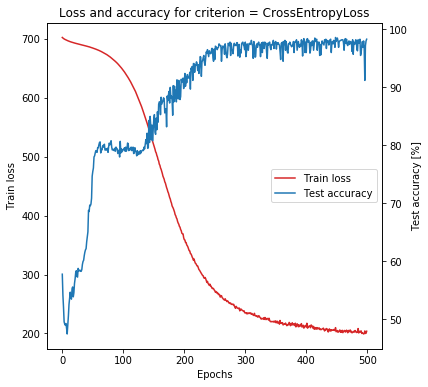

Eta = 0.0002638947368421053,Batchsize = 25,wd = 1e-05, Final Test acc :  98.3
0 train_loss 698.30 test_error 51.00%
50 train_loss 685.68 test_error 38.50%
100 train_loss 662.84 test_error 37.20%
150 train_loss 602.16 test_error 30.30%
200 train_loss 483.66 test_error 22.20%
250 train_loss 337.94 test_error 9.10%
300 train_loss 262.59 test_error 3.70%
350 train_loss 227.41 test_error 2.90%
400 train_loss 208.78 test_error 2.10%
450 train_loss 197.72 test_error 1.70%
499 train_loss 189.55 test_error 2.30%


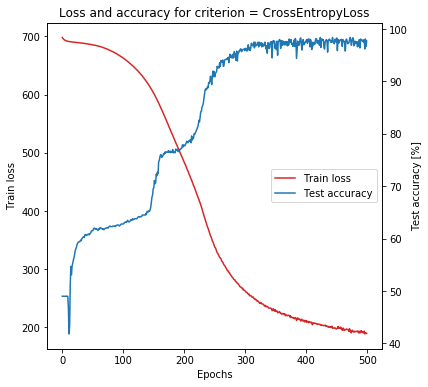

Eta = 0.0002638947368421053,Batchsize = 25,wd = 1e-06, Final Test acc :  97.7
0 train_loss 704.28 test_error 49.00%
50 train_loss 598.46 test_error 19.40%
100 train_loss 370.27 test_error 6.10%
150 train_loss 260.33 test_error 2.50%
200 train_loss 220.07 test_error 1.60%
250 train_loss 198.38 test_error 1.30%
300 train_loss 188.60 test_error 1.80%
350 train_loss 181.33 test_error 2.10%
400 train_loss 175.65 test_error 1.00%
450 train_loss 173.27 test_error 1.20%
499 train_loss 171.86 test_error 0.80%


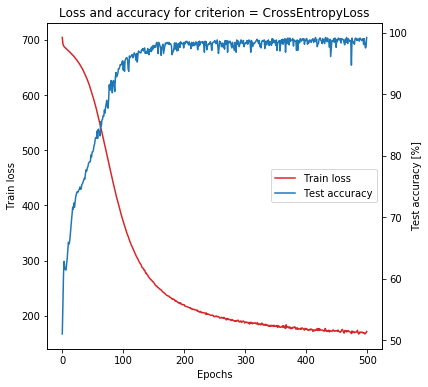

Eta = 0.0002638947368421053,Batchsize = 25,wd = 1e-07, Final Test acc :  99.2
0 train_loss 690.10 test_error 51.00%
50 train_loss 652.80 test_error 28.30%
100 train_loss 501.90 test_error 11.80%
150 train_loss 313.19 test_error 3.50%
200 train_loss 234.49 test_error 3.30%
250 train_loss 207.00 test_error 3.70%
300 train_loss 197.61 test_error 1.70%
350 train_loss 188.42 test_error 2.90%
400 train_loss 188.99 test_error 3.00%
450 train_loss 187.76 test_error 1.40%
499 train_loss 180.59 test_error 1.20%


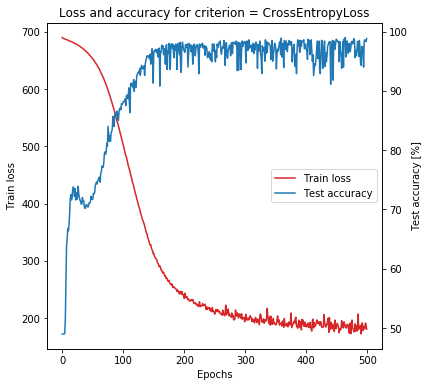

Eta = 0.0002638947368421053,Batchsize = 50,wd = False, Final Test acc :  98.8
0 train_loss 696.51 test_error 45.60%
50 train_loss 670.51 test_error 36.20%
100 train_loss 599.02 test_error 25.00%
150 train_loss 447.54 test_error 12.70%
200 train_loss 304.88 test_error 4.10%
250 train_loss 255.28 test_error 2.90%
300 train_loss 230.19 test_error 2.10%
350 train_loss 221.53 test_error 3.30%
400 train_loss 213.50 test_error 3.40%
450 train_loss 203.62 test_error 5.30%
499 train_loss 195.39 test_error 3.50%


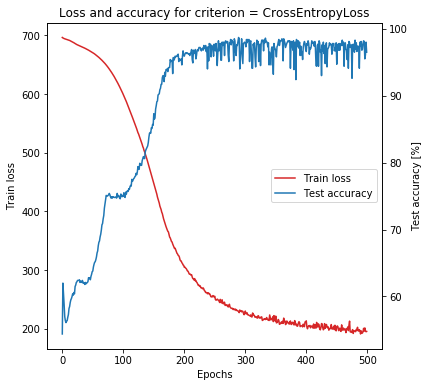

Eta = 0.0002638947368421053,Batchsize = 50,wd = 1e-05, Final Test acc :  96.5
0 train_loss 718.81 test_error 51.20%
50 train_loss 617.81 test_error 22.00%
100 train_loss 396.80 test_error 9.60%
150 train_loss 261.43 test_error 3.00%
200 train_loss 218.80 test_error 1.20%
250 train_loss 198.03 test_error 2.10%
300 train_loss 194.35 test_error 3.60%
350 train_loss 189.68 test_error 2.00%
400 train_loss 179.97 test_error 3.80%
450 train_loss 173.05 test_error 1.90%
499 train_loss 178.69 test_error 3.60%


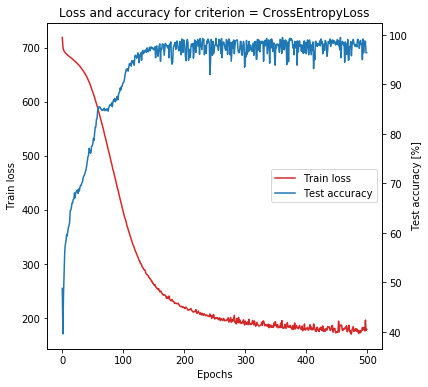

Eta = 0.0002638947368421053,Batchsize = 50,wd = 1e-06, Final Test acc :  96.4
0 train_loss 705.24 test_error 53.70%
50 train_loss 629.78 test_error 35.20%
100 train_loss 462.24 test_error 16.70%
150 train_loss 307.38 test_error 4.50%
200 train_loss 244.70 test_error 3.30%
250 train_loss 217.11 test_error 2.50%
300 train_loss 198.42 test_error 6.00%
350 train_loss 188.91 test_error 2.20%
400 train_loss 185.45 test_error 1.50%
450 train_loss 180.40 test_error 3.80%
499 train_loss 175.07 test_error 1.50%


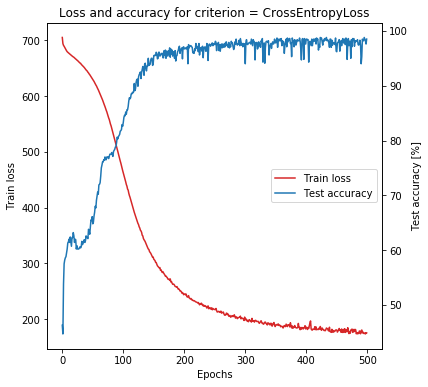

Eta = 0.0002638947368421053,Batchsize = 50,wd = 1e-07, Final Test acc :  98.5
0 train_loss 697.49 test_error 49.00%
50 train_loss 676.86 test_error 16.70%
100 train_loss 569.72 test_error 10.50%
150 train_loss 318.11 test_error 5.20%
200 train_loss 239.10 test_error 2.30%
250 train_loss 204.40 test_error 1.80%
300 train_loss 194.14 test_error 1.40%
350 train_loss 189.87 test_error 1.60%
400 train_loss 181.21 test_error 2.30%
450 train_loss 174.33 test_error 1.70%
499 train_loss 171.87 test_error 2.20%


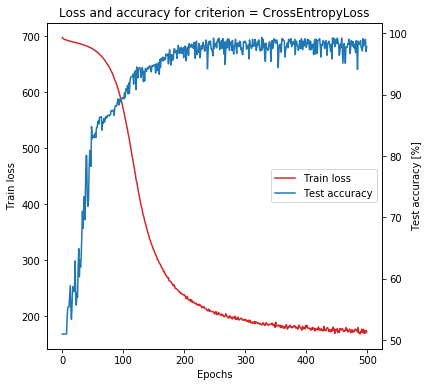

Eta = 0.0003164736842105264,Batchsize = 25,wd = False, Final Test acc :  97.8
0 train_loss 692.73 test_error 51.00%
50 train_loss 669.89 test_error 24.00%
100 train_loss 566.30 test_error 21.20%
150 train_loss 364.20 test_error 8.60%
200 train_loss 263.83 test_error 2.60%
250 train_loss 226.33 test_error 2.10%
300 train_loss 213.26 test_error 1.20%
350 train_loss 199.25 test_error 5.10%
400 train_loss 198.56 test_error 3.70%
450 train_loss 196.23 test_error 2.10%
499 train_loss 192.95 test_error 3.30%


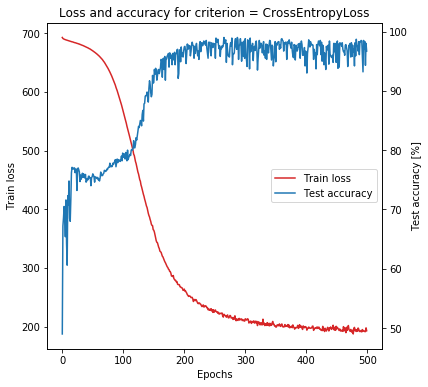

Eta = 0.0003164736842105264,Batchsize = 25,wd = 1e-05, Final Test acc :  96.7
0 train_loss 695.76 test_error 49.00%
50 train_loss 646.11 test_error 19.30%
100 train_loss 427.39 test_error 9.80%
150 train_loss 270.06 test_error 3.90%
200 train_loss 221.13 test_error 2.10%
250 train_loss 201.47 test_error 2.10%
300 train_loss 187.75 test_error 2.10%
350 train_loss 183.96 test_error 1.60%
400 train_loss 177.39 test_error 2.90%
450 train_loss 173.47 test_error 2.40%
499 train_loss 170.78 test_error 1.30%


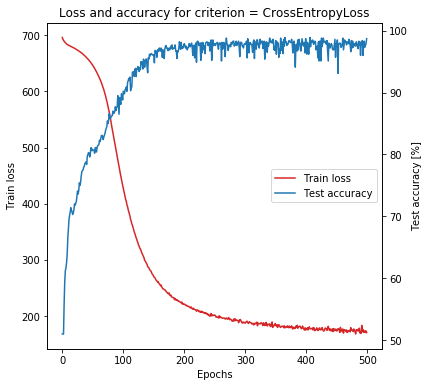

Eta = 0.0003164736842105264,Batchsize = 25,wd = 1e-06, Final Test acc :  98.7
0 train_loss 726.47 test_error 51.00%
50 train_loss 667.59 test_error 34.20%
100 train_loss 486.26 test_error 10.60%
150 train_loss 300.65 test_error 5.80%
200 train_loss 237.09 test_error 5.40%
250 train_loss 212.27 test_error 1.90%
300 train_loss 199.25 test_error 2.30%
350 train_loss 187.10 test_error 2.10%
400 train_loss 182.69 test_error 2.60%
450 train_loss 175.62 test_error 5.40%
499 train_loss 188.41 test_error 2.00%


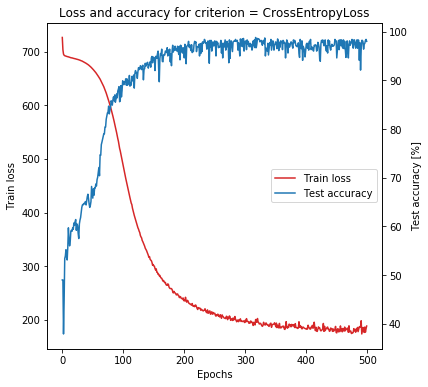

Eta = 0.0003164736842105264,Batchsize = 25,wd = 1e-07, Final Test acc :  98.0
0 train_loss 690.90 test_error 48.50%
50 train_loss 626.43 test_error 33.20%
100 train_loss 494.90 test_error 24.60%
150 train_loss 321.98 test_error 5.80%
200 train_loss 244.33 test_error 3.10%
250 train_loss 211.03 test_error 3.60%
300 train_loss 200.72 test_error 2.90%
350 train_loss 188.64 test_error 5.10%
400 train_loss 179.12 test_error 2.50%
450 train_loss 178.90 test_error 2.20%
499 train_loss 185.95 test_error 2.10%


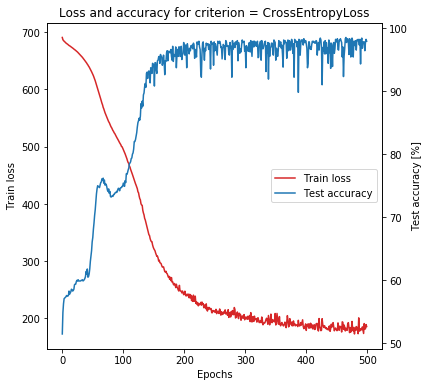

Eta = 0.0003164736842105264,Batchsize = 50,wd = False, Final Test acc :  97.9
0 train_loss 711.02 test_error 51.00%
50 train_loss 601.08 test_error 16.30%
100 train_loss 351.12 test_error 6.90%
150 train_loss 244.67 test_error 2.60%
200 train_loss 217.28 test_error 1.70%
250 train_loss 205.15 test_error 3.00%
300 train_loss 198.55 test_error 2.20%
350 train_loss 196.94 test_error 3.70%
400 train_loss 185.53 test_error 3.80%
450 train_loss 180.64 test_error 2.40%
499 train_loss 180.55 test_error 6.30%


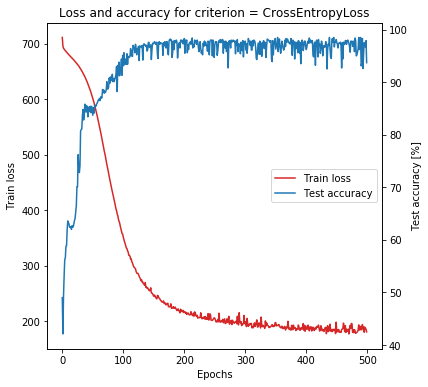

Eta = 0.0003164736842105264,Batchsize = 50,wd = 1e-05, Final Test acc :  93.7
0 train_loss 694.49 test_error 39.10%
50 train_loss 671.42 test_error 40.00%
100 train_loss 549.54 test_error 18.10%
150 train_loss 307.74 test_error 10.60%
200 train_loss 243.68 test_error 3.20%
250 train_loss 236.37 test_error 2.20%
300 train_loss 199.77 test_error 2.00%
350 train_loss 184.18 test_error 1.80%
400 train_loss 188.41 test_error 1.50%
450 train_loss 176.10 test_error 2.20%
499 train_loss 175.07 test_error 1.50%


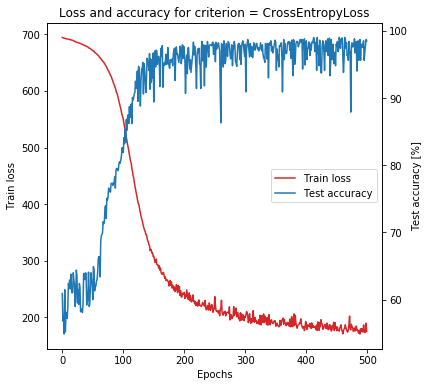

Eta = 0.0003164736842105264,Batchsize = 50,wd = 1e-06, Final Test acc :  98.5
0 train_loss 719.89 test_error 51.00%
50 train_loss 654.81 test_error 32.70%
100 train_loss 550.68 test_error 22.10%
150 train_loss 357.54 test_error 5.30%
200 train_loss 254.95 test_error 3.50%
250 train_loss 218.65 test_error 3.30%
300 train_loss 206.99 test_error 2.20%
350 train_loss 189.63 test_error 2.10%
400 train_loss 186.34 test_error 2.80%
450 train_loss 192.16 test_error 1.60%
499 train_loss 177.50 test_error 2.80%


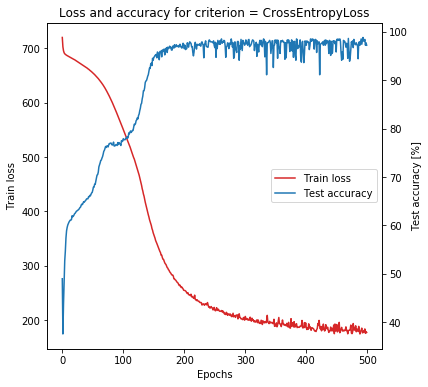

Eta = 0.0003164736842105264,Batchsize = 50,wd = 1e-07, Final Test acc :  97.2
0 train_loss 688.19 test_error 44.00%
50 train_loss 603.94 test_error 27.60%
100 train_loss 327.92 test_error 6.20%
150 train_loss 224.48 test_error 1.90%
200 train_loss 198.92 test_error 1.40%
250 train_loss 182.46 test_error 3.30%
300 train_loss 182.83 test_error 2.50%
350 train_loss 171.72 test_error 1.70%
400 train_loss 166.51 test_error 1.80%
450 train_loss 166.07 test_error 3.80%
499 train_loss 169.02 test_error 1.30%


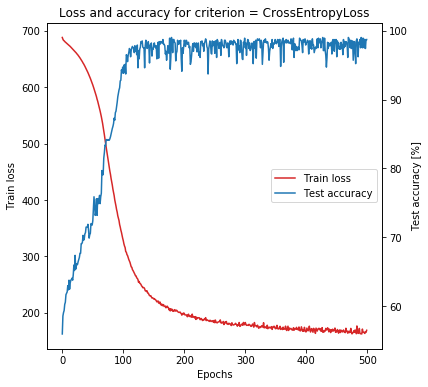

Eta = 0.00036905263157894743,Batchsize = 25,wd = False, Final Test acc :  98.7
0 train_loss 732.39 test_error 51.00%
50 train_loss 635.85 test_error 31.60%
100 train_loss 417.07 test_error 9.90%
150 train_loss 276.14 test_error 4.30%
200 train_loss 237.07 test_error 6.00%
250 train_loss 213.82 test_error 2.00%
300 train_loss 205.43 test_error 3.70%
350 train_loss 202.35 test_error 2.20%
400 train_loss 194.04 test_error 3.00%
450 train_loss 203.79 test_error 2.60%
499 train_loss 199.67 test_error 3.00%


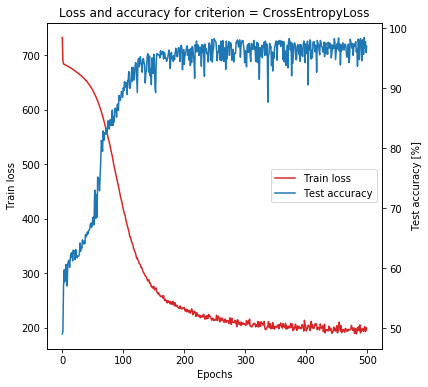

Eta = 0.00036905263157894743,Batchsize = 25,wd = 1e-05, Final Test acc :  97.0
0 train_loss 696.05 test_error 50.50%
50 train_loss 628.37 test_error 22.20%
100 train_loss 468.44 test_error 17.50%
150 train_loss 276.88 test_error 3.70%
200 train_loss 217.92 test_error 3.70%
250 train_loss 200.60 test_error 2.60%
300 train_loss 195.00 test_error 5.30%
350 train_loss 193.72 test_error 12.90%
400 train_loss 187.43 test_error 3.50%
450 train_loss 192.79 test_error 3.30%
499 train_loss 181.15 test_error 4.80%


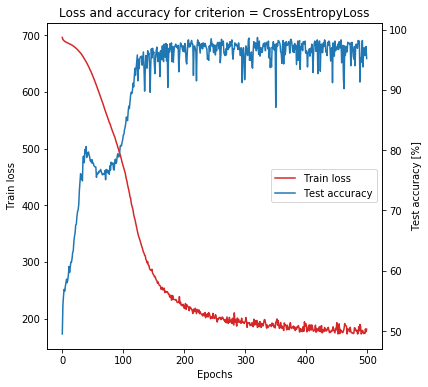

Eta = 0.00036905263157894743,Batchsize = 25,wd = 1e-06, Final Test acc :  95.2
0 train_loss 700.94 test_error 49.00%
50 train_loss 661.32 test_error 21.90%
100 train_loss 471.70 test_error 9.70%
150 train_loss 257.01 test_error 4.30%
200 train_loss 208.97 test_error 3.70%
250 train_loss 195.29 test_error 1.80%
300 train_loss 182.35 test_error 1.70%
350 train_loss 175.97 test_error 4.30%
400 train_loss 175.35 test_error 2.50%
450 train_loss 165.67 test_error 4.10%
499 train_loss 171.62 test_error 2.30%


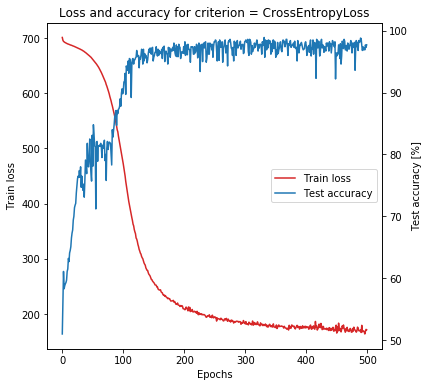

Eta = 0.00036905263157894743,Batchsize = 25,wd = 1e-07, Final Test acc :  97.7
0 train_loss 777.65 test_error 51.00%
50 train_loss 628.08 test_error 23.30%
100 train_loss 409.70 test_error 8.20%
150 train_loss 269.92 test_error 2.80%
200 train_loss 225.31 test_error 3.60%
250 train_loss 207.40 test_error 5.00%
300 train_loss 200.84 test_error 6.00%
350 train_loss 191.54 test_error 1.90%
400 train_loss 186.62 test_error 3.70%
450 train_loss 188.09 test_error 1.80%
499 train_loss 195.23 test_error 2.80%


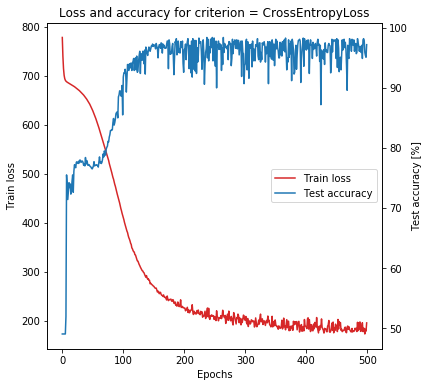

Eta = 0.00036905263157894743,Batchsize = 50,wd = False, Final Test acc :  97.2
0 train_loss 705.96 test_error 51.00%
50 train_loss 598.15 test_error 20.00%
100 train_loss 360.90 test_error 8.90%
150 train_loss 262.38 test_error 4.90%
200 train_loss 225.08 test_error 4.10%
250 train_loss 205.22 test_error 5.20%
300 train_loss 204.56 test_error 3.60%
350 train_loss 202.12 test_error 5.60%
400 train_loss 187.33 test_error 3.40%
450 train_loss 205.91 test_error 4.40%
499 train_loss 205.81 test_error 4.10%


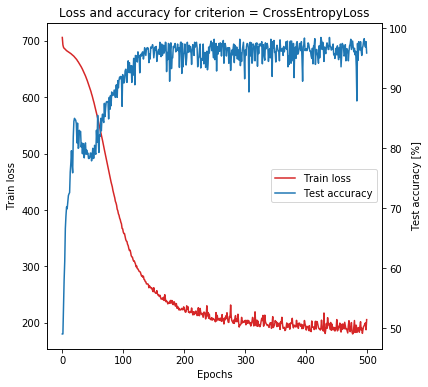

Eta = 0.00036905263157894743,Batchsize = 50,wd = 1e-05, Final Test acc :  95.9
0 train_loss 695.29 test_error 49.00%
50 train_loss 675.05 test_error 24.00%
100 train_loss 578.65 test_error 21.70%
150 train_loss 360.44 test_error 9.30%
200 train_loss 263.93 test_error 3.20%
250 train_loss 235.69 test_error 6.40%
300 train_loss 209.07 test_error 9.60%
350 train_loss 217.34 test_error 2.10%
400 train_loss 196.45 test_error 1.70%
450 train_loss 194.66 test_error 2.40%
499 train_loss 182.92 test_error 4.30%


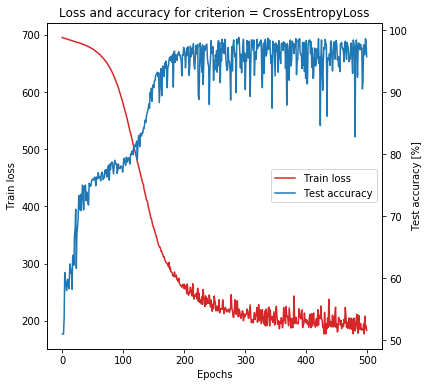

Eta = 0.00036905263157894743,Batchsize = 50,wd = 1e-06, Final Test acc :  95.7
0 train_loss 696.19 test_error 62.50%
50 train_loss 561.62 test_error 24.40%
100 train_loss 359.14 test_error 9.70%
150 train_loss 261.80 test_error 3.90%
200 train_loss 229.09 test_error 4.10%
250 train_loss 221.77 test_error 4.30%
300 train_loss 205.12 test_error 3.00%
350 train_loss 188.33 test_error 2.60%
400 train_loss 191.48 test_error 2.60%
450 train_loss 176.43 test_error 2.90%
499 train_loss 175.58 test_error 2.90%


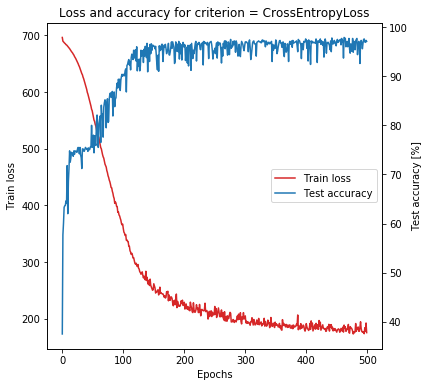

Eta = 0.00036905263157894743,Batchsize = 50,wd = 1e-07, Final Test acc :  97.1
0 train_loss 728.46 test_error 49.00%
50 train_loss 681.84 test_error 39.50%
100 train_loss 536.54 test_error 23.10%
150 train_loss 275.78 test_error 3.00%
200 train_loss 218.00 test_error 3.70%
250 train_loss 196.24 test_error 2.50%
300 train_loss 199.66 test_error 4.50%
350 train_loss 192.40 test_error 2.70%
400 train_loss 197.43 test_error 3.50%
450 train_loss 181.62 test_error 3.20%
499 train_loss 182.56 test_error 3.40%


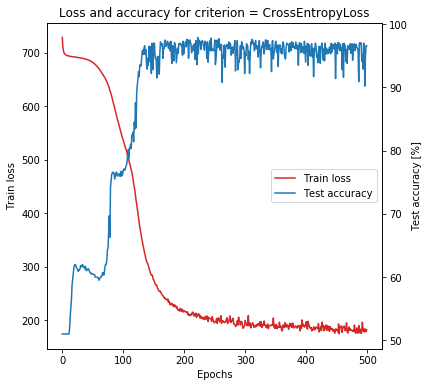

Eta = 0.0004216315789473685,Batchsize = 25,wd = False, Final Test acc :  96.6
0 train_loss 732.37 test_error 49.00%
50 train_loss 670.24 test_error 27.70%
100 train_loss 475.71 test_error 9.20%
150 train_loss 277.86 test_error 4.80%
200 train_loss 227.40 test_error 4.90%
250 train_loss 211.60 test_error 3.40%
300 train_loss 197.39 test_error 4.30%
350 train_loss 191.24 test_error 4.20%
400 train_loss 191.76 test_error 1.90%
450 train_loss 188.16 test_error 3.10%
499 train_loss 190.77 test_error 2.80%


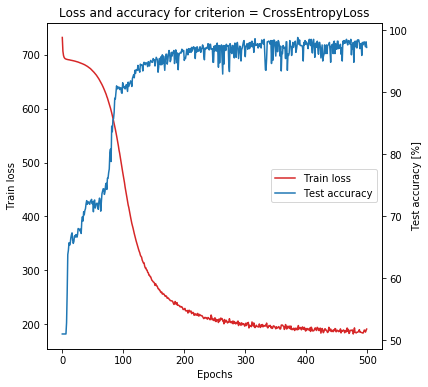

Eta = 0.0004216315789473685,Batchsize = 25,wd = 1e-05, Final Test acc :  97.2
0 train_loss 696.36 test_error 59.40%
50 train_loss 619.56 test_error 23.70%
100 train_loss 345.69 test_error 4.50%
150 train_loss 233.18 test_error 3.70%
200 train_loss 209.64 test_error 3.40%
250 train_loss 190.23 test_error 2.00%
300 train_loss 177.50 test_error 5.60%
350 train_loss 188.74 test_error 2.30%
400 train_loss 176.98 test_error 2.00%
450 train_loss 176.14 test_error 2.10%
499 train_loss 177.25 test_error 2.10%


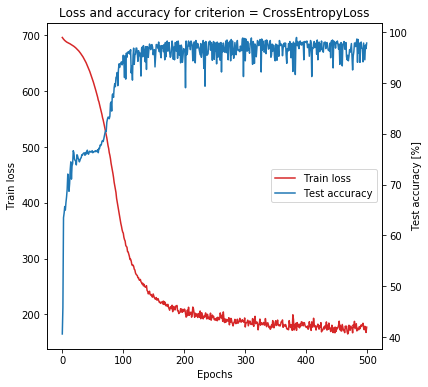

Eta = 0.0004216315789473685,Batchsize = 25,wd = 1e-06, Final Test acc :  97.9
0 train_loss 737.41 test_error 49.00%
50 train_loss 651.40 test_error 37.20%
100 train_loss 405.90 test_error 12.60%
150 train_loss 244.90 test_error 5.30%
200 train_loss 208.91 test_error 3.00%


KeyboardInterrupt: 

In [10]:
#Grid 3
accuracy_list2 = []
for lr in np.linspace(1e-6,1e-3,20):
    for b in [25,50]:
        for wd in [False,1e-5,1e-6,1e-7]:
            #reset parameters to "unlearn"
            model.reset_param()
            losses, test_accs = train_model_SGD(model,CROSS,data,target,data_test,target_test,
                                           b,nb_epochs,eta = lr, wd=wd,
                                            plot_loss=True,plot_points=False)
            accuracy_list2.append([lr,b,wd,test_accs[-1]])
            print("Eta = {},Batchsize = {},wd = {}, Final Test acc : ".format(lr,b,wd), test_accs[-1])

In [14]:
for i in range(len(accuracy_list)):
    print(accuracy_list[i])

[0.0001, 50, False, 95.7]
[0.0001, 50, 3e-05, 76.0]
[0.0001, 50, 0.0003, 49.0]
[0.0001, 100, False, 96.1]
[0.0001, 100, 3e-05, 96.3]
[0.0001, 100, 0.0003, 49.0]
[0.0112, 50, False, 96.1]
[0.0112, 50, 3e-05, 94.4]
[0.0112, 50, 0.0003, 88.4]
[0.0112, 100, False, 94.5]
[0.0112, 100, 3e-05, 93.0]
[0.0112, 100, 0.0003, 83.4]
[0.0223, 50, False, 95.6]
[0.0223, 50, 3e-05, 93.9]
[0.0223, 50, 0.0003, 87.3]
[0.0223, 100, False, 78.3]
[0.0223, 100, 3e-05, 90.6]
[0.0223, 100, 0.0003, 78.8]
[0.033400000000000006, 50, False, 95.0]
[0.033400000000000006, 50, 3e-05, 97.8]
[0.033400000000000006, 50, 0.0003, 82.9]
[0.033400000000000006, 100, False, 49.0]
[0.033400000000000006, 100, 3e-05, 81.4]
[0.033400000000000006, 100, 0.0003, 79.9]
[0.044500000000000005, 50, False, 80.6]
[0.044500000000000005, 50, 3e-05, 89.9]
[0.044500000000000005, 50, 0.0003, 78.1]
[0.044500000000000005, 100, False, 51.0]
[0.044500000000000005, 100, 3e-05, 52.8]
[0.044500000000000005, 100, 0.0003, 81.7]
[0.055600000000000004, 50, 

In [13]:
for i in range(len(accuracy_list2)):
    print(accuracy_list2[i])

[1e-06, 25, False, 73.1]
[1e-06, 25, 1e-05, 51.0]
[1e-06, 25, 1e-06, 51.0]
[1e-06, 25, 1e-07, 50.3]
[1e-06, 50, False, 57.6]
[1e-06, 50, 1e-05, 51.0]
[1e-06, 50, 1e-06, 49.0]
[1e-06, 50, 1e-07, 49.0]
[5.357894736842106e-05, 25, False, 85.2]
[5.357894736842106e-05, 25, 1e-05, 85.7]
[5.357894736842106e-05, 25, 1e-06, 72.2]
[5.357894736842106e-05, 25, 1e-07, 73.5]
[5.357894736842106e-05, 50, False, 76.9]
[5.357894736842106e-05, 50, 1e-05, 76.9]
[5.357894736842106e-05, 50, 1e-06, 95.4]
[5.357894736842106e-05, 50, 1e-07, 79.1]
[0.00010615789473684212, 25, False, 97.4]
[0.00010615789473684212, 25, 1e-05, 97.1]
[0.00010615789473684212, 25, 1e-06, 95.5]
[0.00010615789473684212, 25, 1e-07, 96.0]
[0.00010615789473684212, 50, False, 97.5]
[0.00010615789473684212, 50, 1e-05, 97.7]
[0.00010615789473684212, 50, 1e-06, 97.8]
[0.00010615789473684212, 50, 1e-07, 96.1]
[0.00015873684210526319, 25, False, 98.7]
[0.00015873684210526319, 25, 1e-05, 97.6]
[0.00015873684210526319, 25, 1e-06, 98.4]
[0.0001587